In [1]:
library('astsa')
library(forecast)

options(repr.plot.width=14, repr.plot.height=6)


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




In [2]:
setwd('./')
ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_resampled.csv")

In [3]:
ts_df <- ts_df[,2]

x = ts(ts_df, start=0 , frequency=1)


In [4]:
x = x/300000 # paso la unidad a slots

In [5]:
ts_df = ts_df/300000 # paso la unidad a slots

In [6]:
ts_df = ts(ts_df, start=0, frequency=1)

In [7]:
start_test = 5184

ts_length = length(ts_df)

ts_length

ts_df_train = ts(ts_df[1:start_test-1], start=0, frequency=1)
ts_df_test = ts(ts_df[start_test:ts_length], start=start_test, frequency=1)

[1] 8928

In [8]:
dn = ts_df_train
dnt = ts_df_test

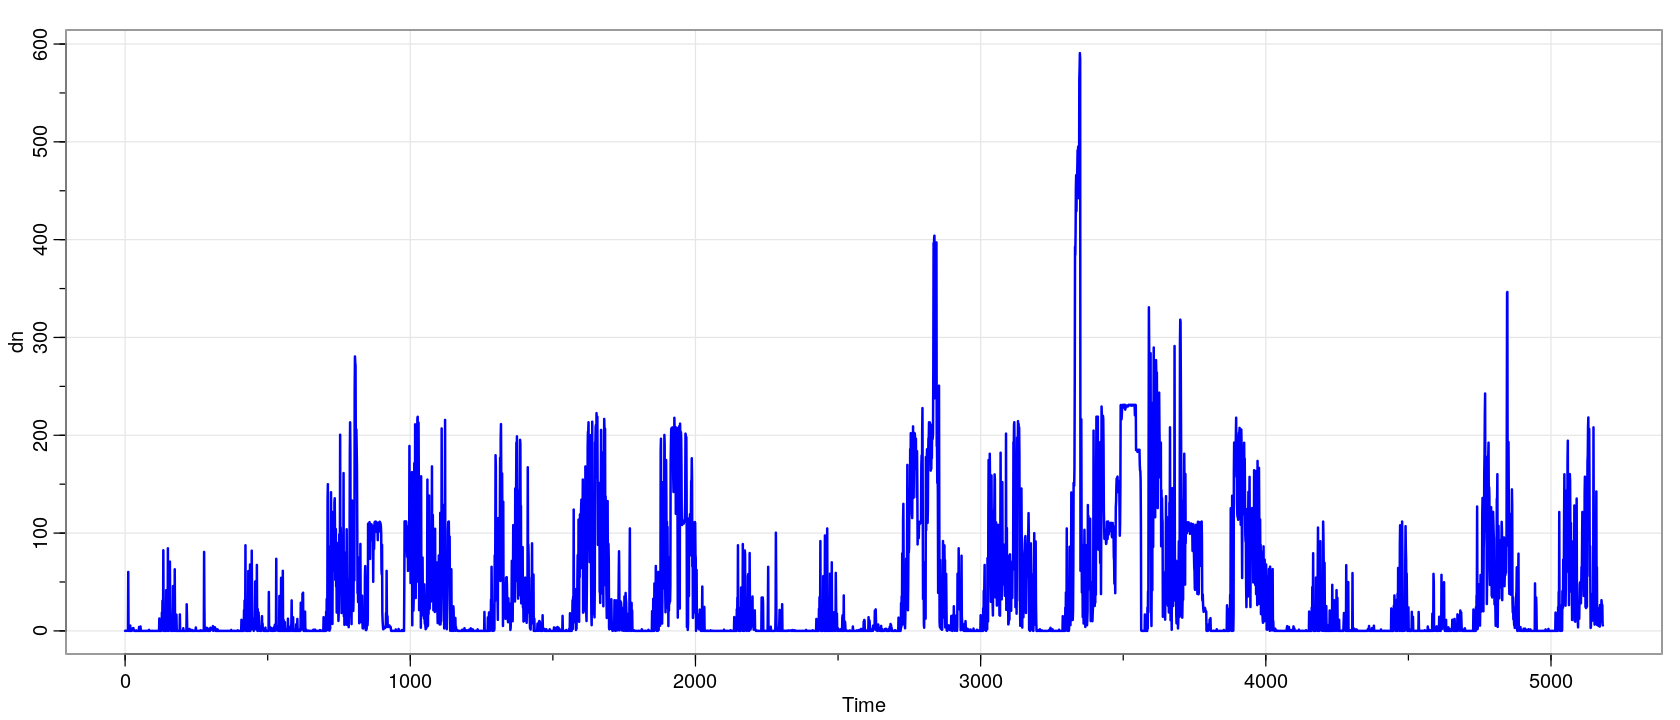

[1] 5183

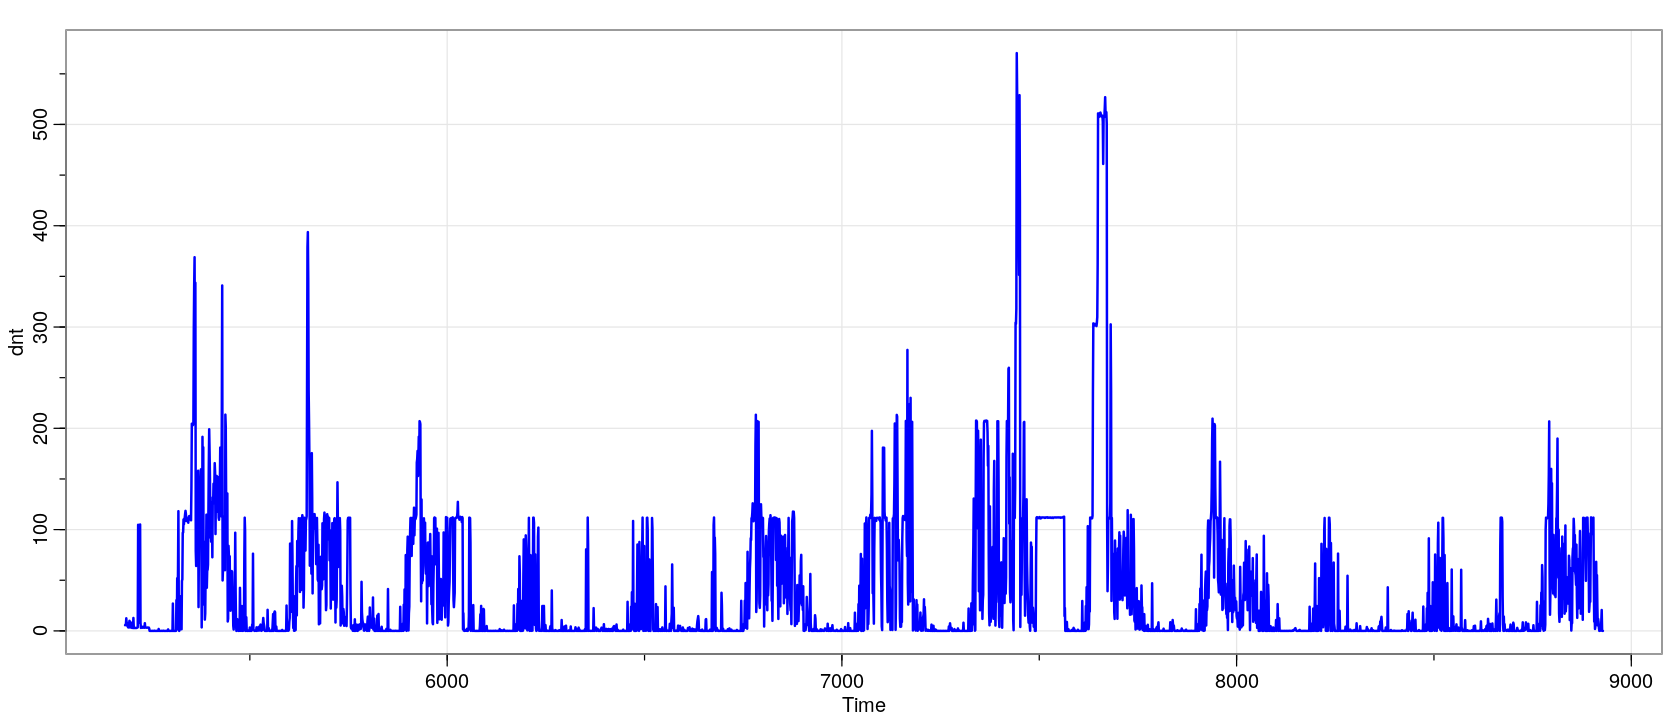

In [9]:
tsplot(dn, col=4, lwd=2)
tsplot(dnt, col=4, lwd=2)

length(time(dn))

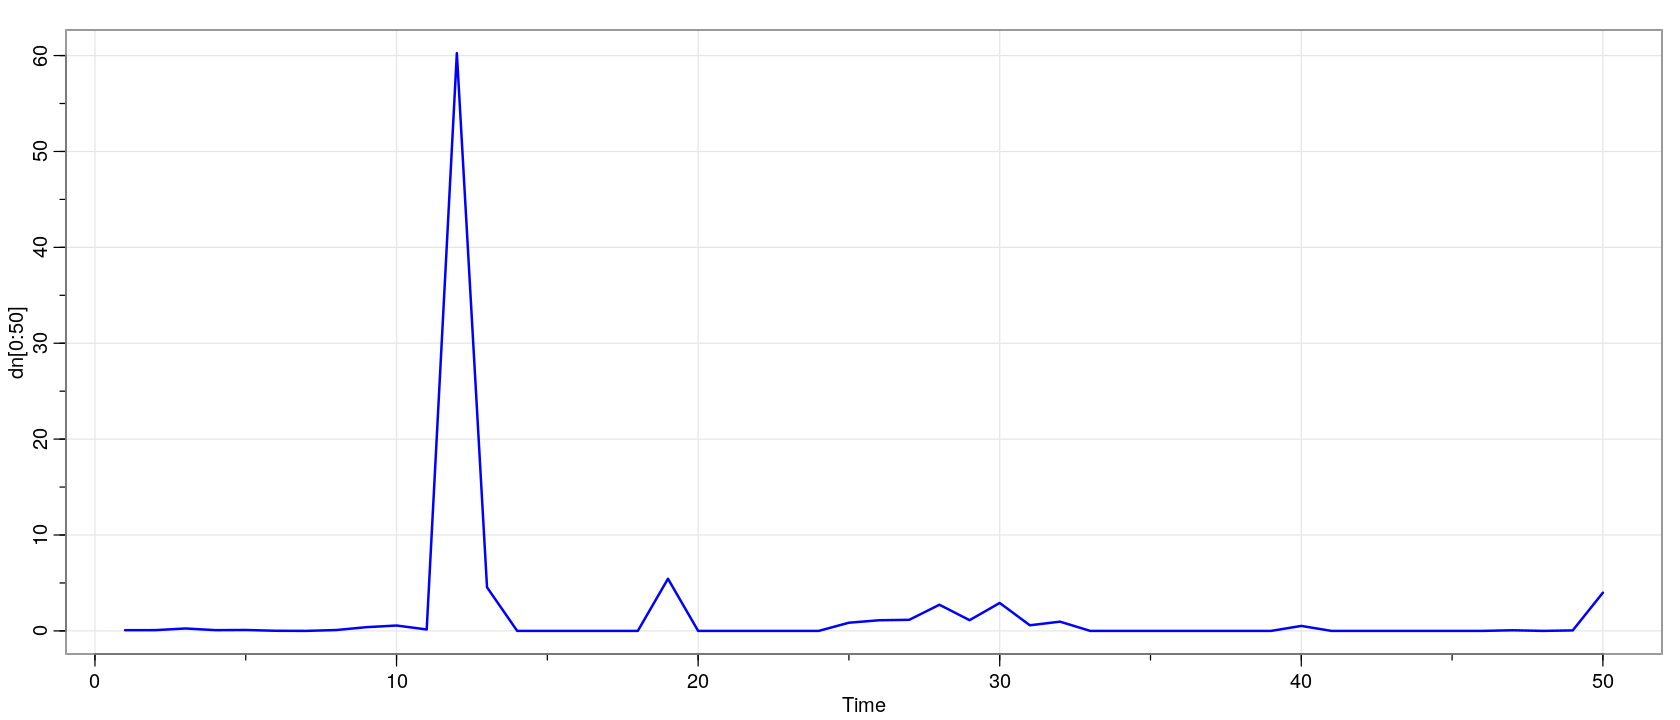

In [10]:
tsplot(dn[0:50], col=4, lwd=2)

In [11]:
# Comentarios Andres clase 09/06/2021

# tirarle periodogramas para asi primero intentar sacar perioricidad

# transformacion log - 
# 
# simular series como estas

# ajuste, simular escenarios y calcular promedios de costos e inetrvalos de confianza




# luego vemos si hacemos un modelo de markov (leer los notebooks que hay disponible, no lo vamos a ver en el curso pero probablemente caminen bien)





Probamos haciendo la transformacion log que comentó Andrés. (10/06/2021)

In [12]:
# agrego para probar +1 para evitar log(0)= -inf
ldn = log(dn+1)
ldnt = log(dnt+1)

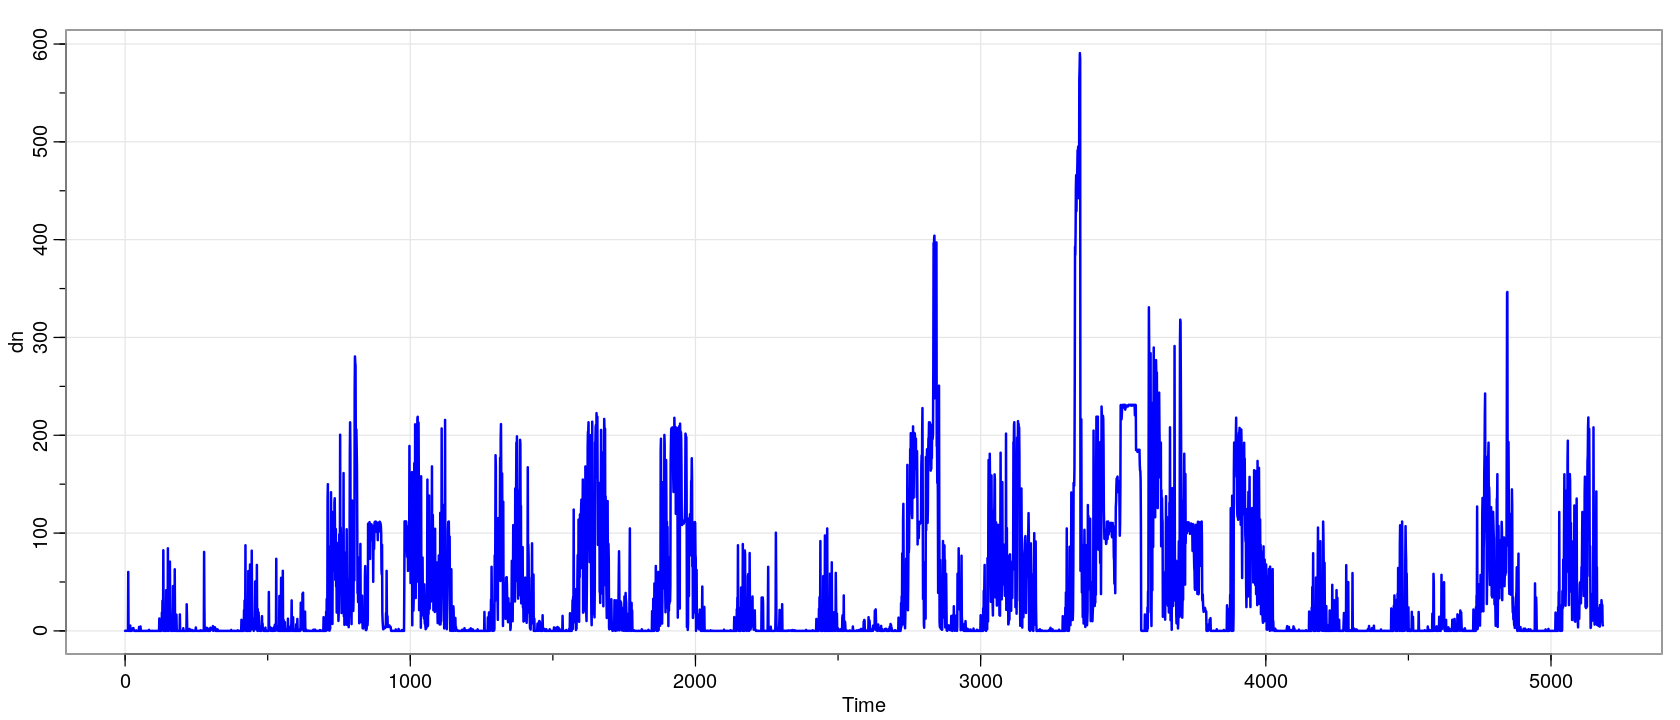

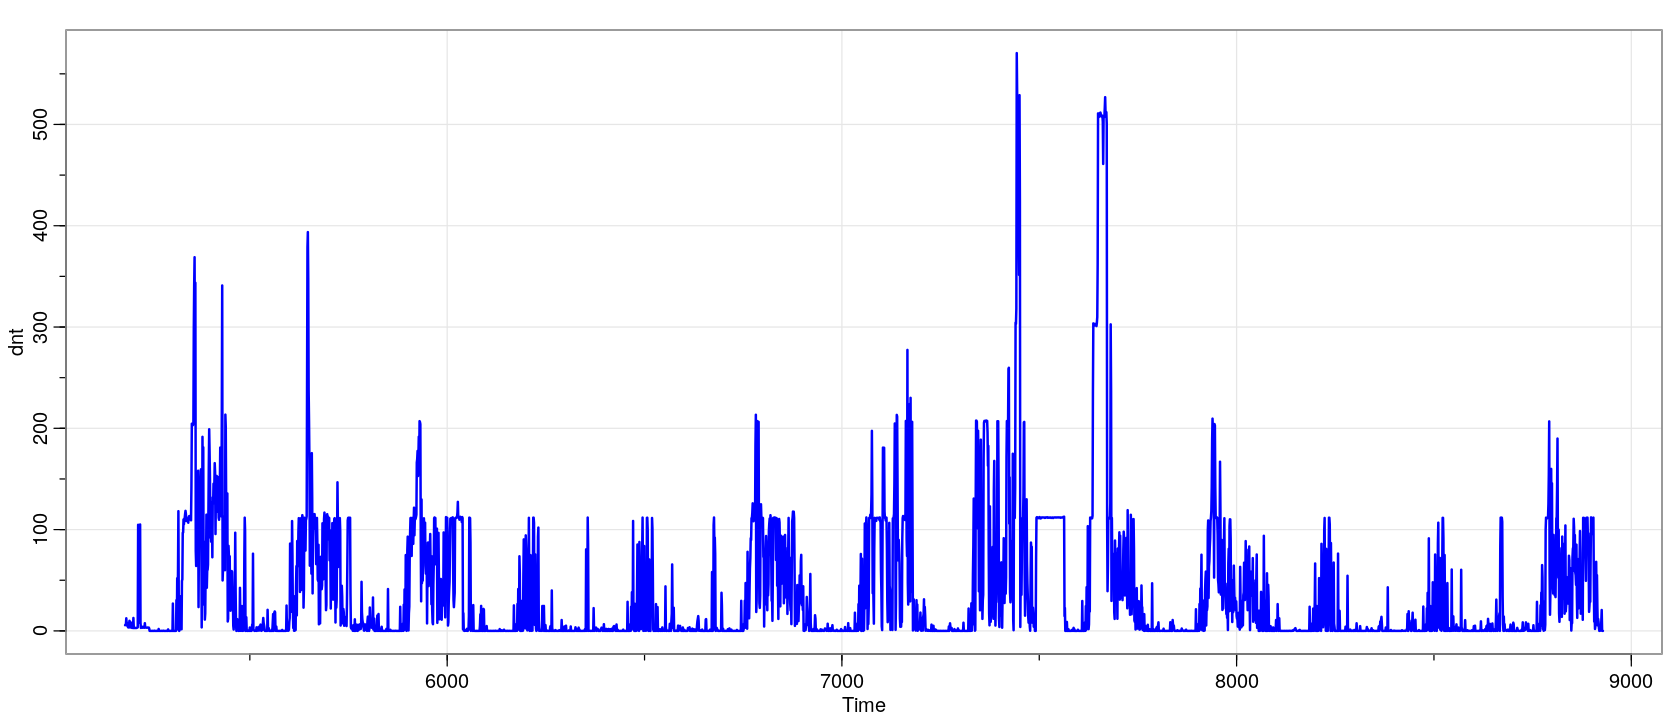

In [13]:
tsplot(dn, col=4, lwd=2)
tsplot(dnt, col=4, lwd=2)


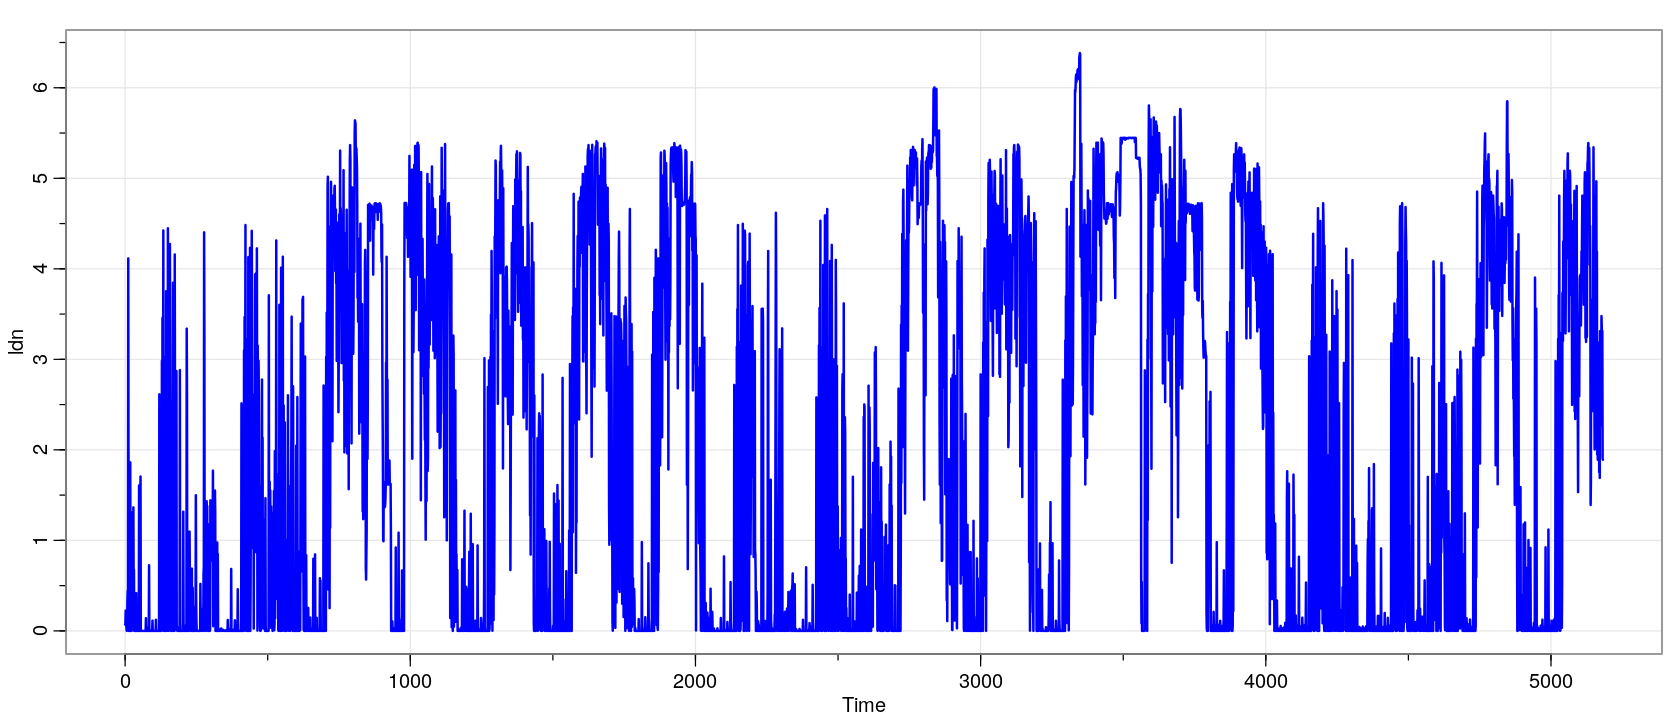

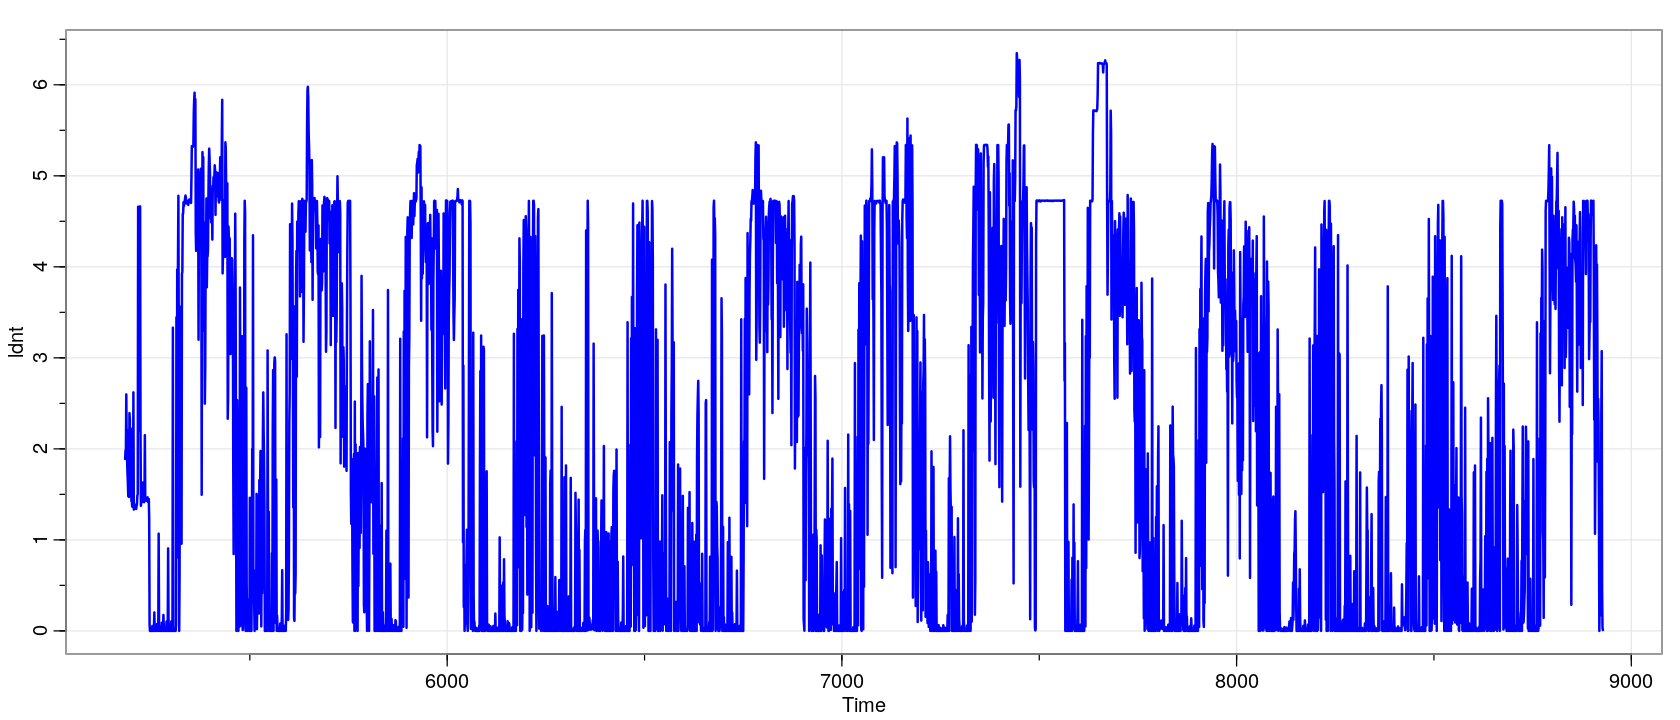

In [14]:
tsplot(ldn, col=4, lwd=2)
tsplot(ldnt, col=4, lwd=2)

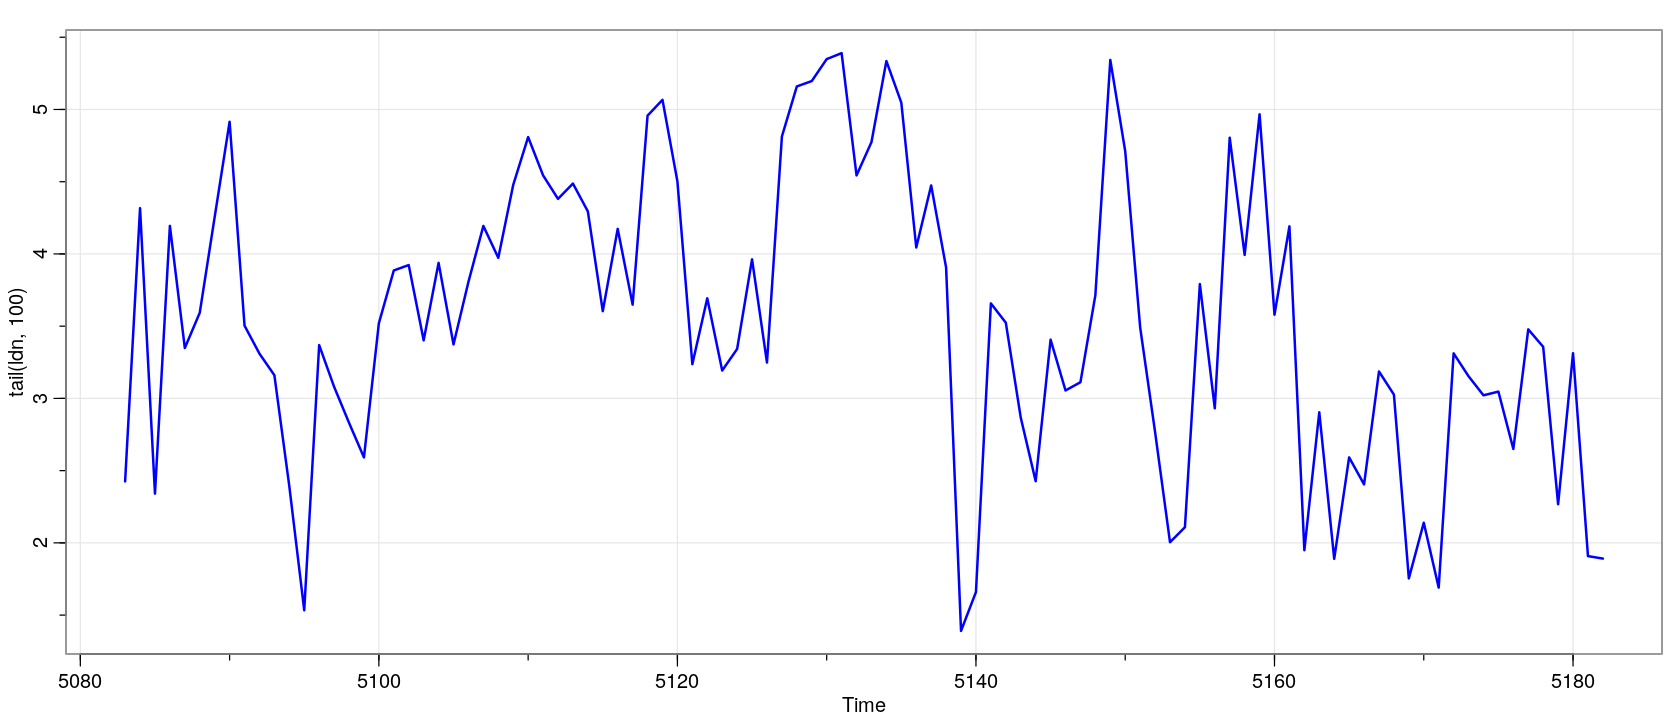

In [15]:
tsplot(tail(ldn,100), col=4, lwd=2)

In [16]:
t = time(ldn)


Call:
lm(formula = ldn ~ t, na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3677 -1.8643 -0.7053  1.9869  4.2817 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.571e+00  5.602e-02  28.053   <2e-16 ***
t           1.583e-04  1.872e-05   8.453   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.017 on 5181 degrees of freedom
Multiple R-squared:  0.01361,	Adjusted R-squared:  0.01341 
F-statistic: 71.46 on 1 and 5181 DF,  p-value: < 2.2e-16


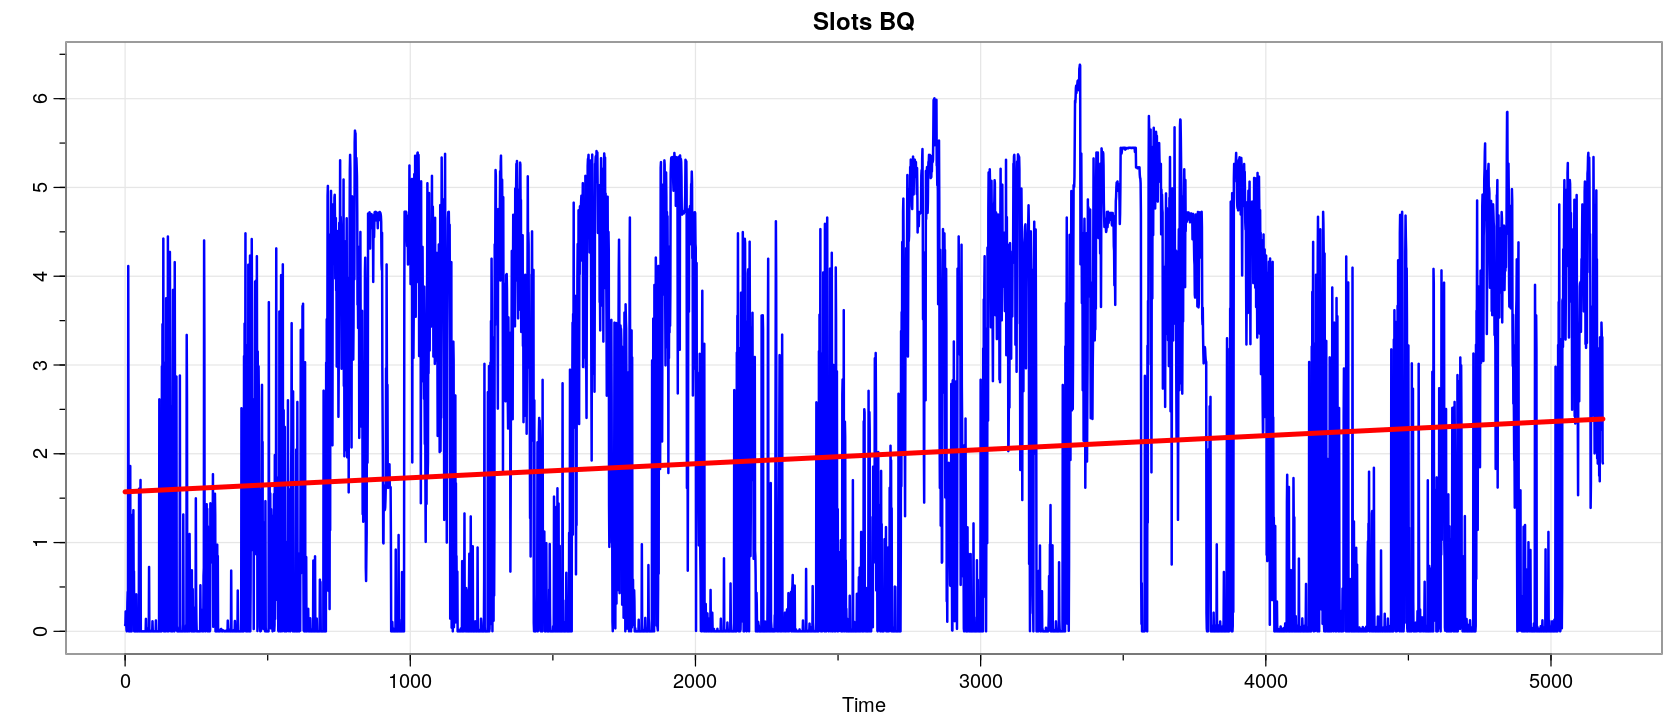

In [17]:
fit = lm(ldn ~ t, na.action=NULL)
summary(fit)

num = length(ldn)

tsplot(ldn, ylab="", main="Slots BQ", col=4, lwd=2)
ndata <- data.frame(t = 5184)
predict_trend = predict(fit,newdata=ndata)
predicttrend = ts(fitted(fit), start=0, freq=1)
lines(predicttrend, col=2, lwd=4)

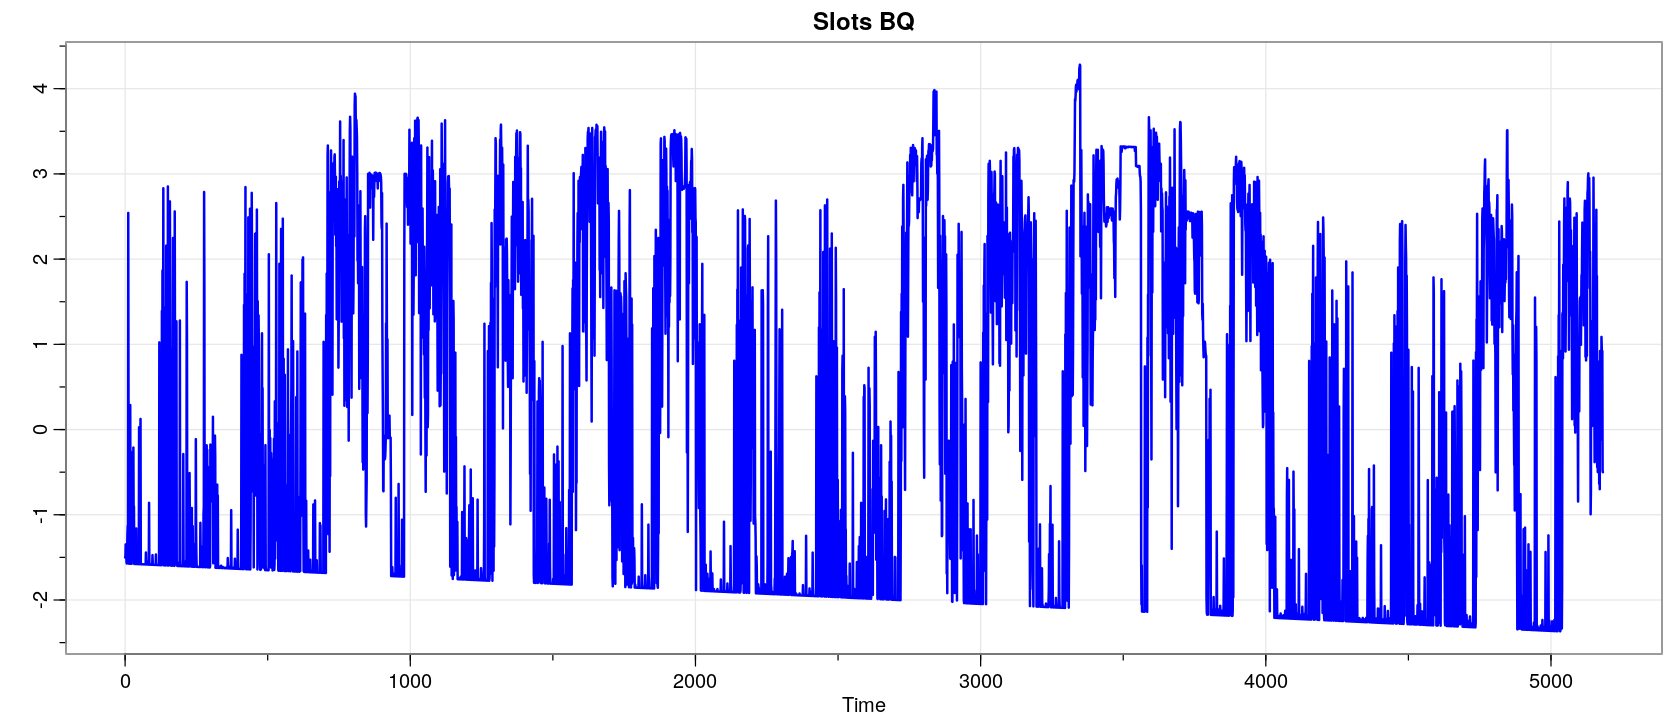

In [18]:
ldn = as.numeric(ldn)
ldnc = ldn-predicttrend

tsplot(ldnc, ylab="", main="Slots BQ", col=4, lwd=2)

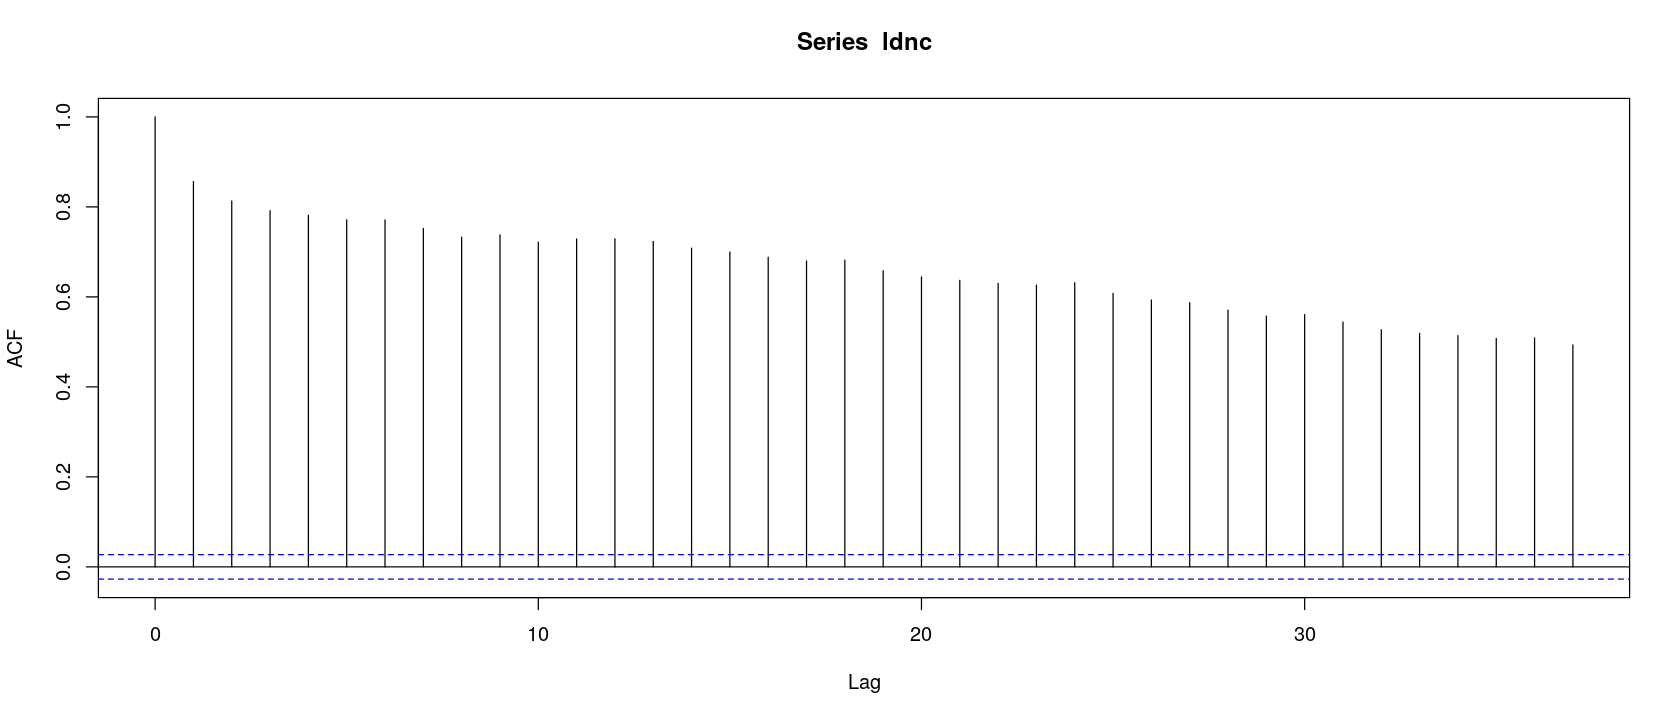

In [19]:
acf(ldnc)

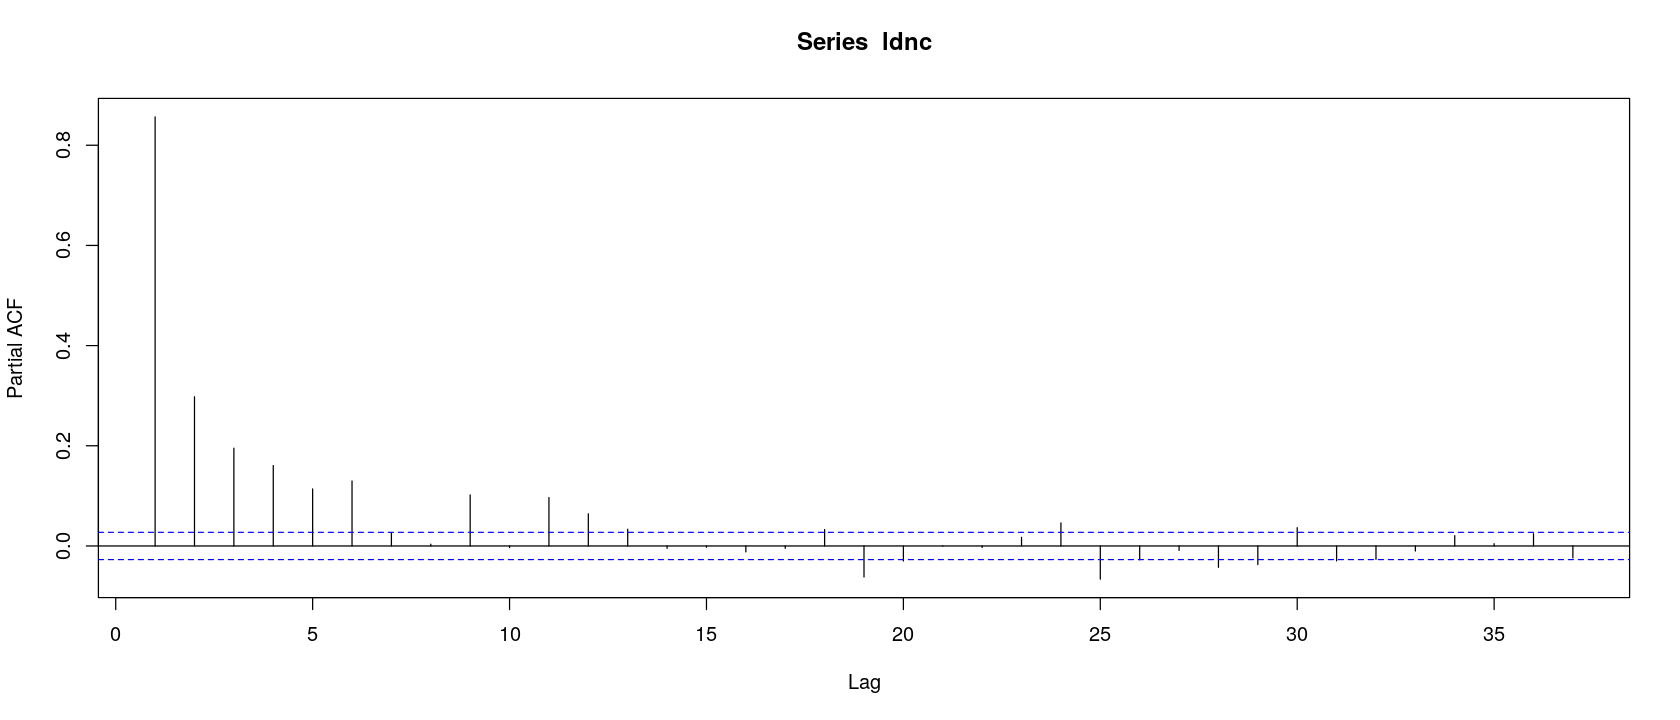

In [20]:
pacf(ldnc)

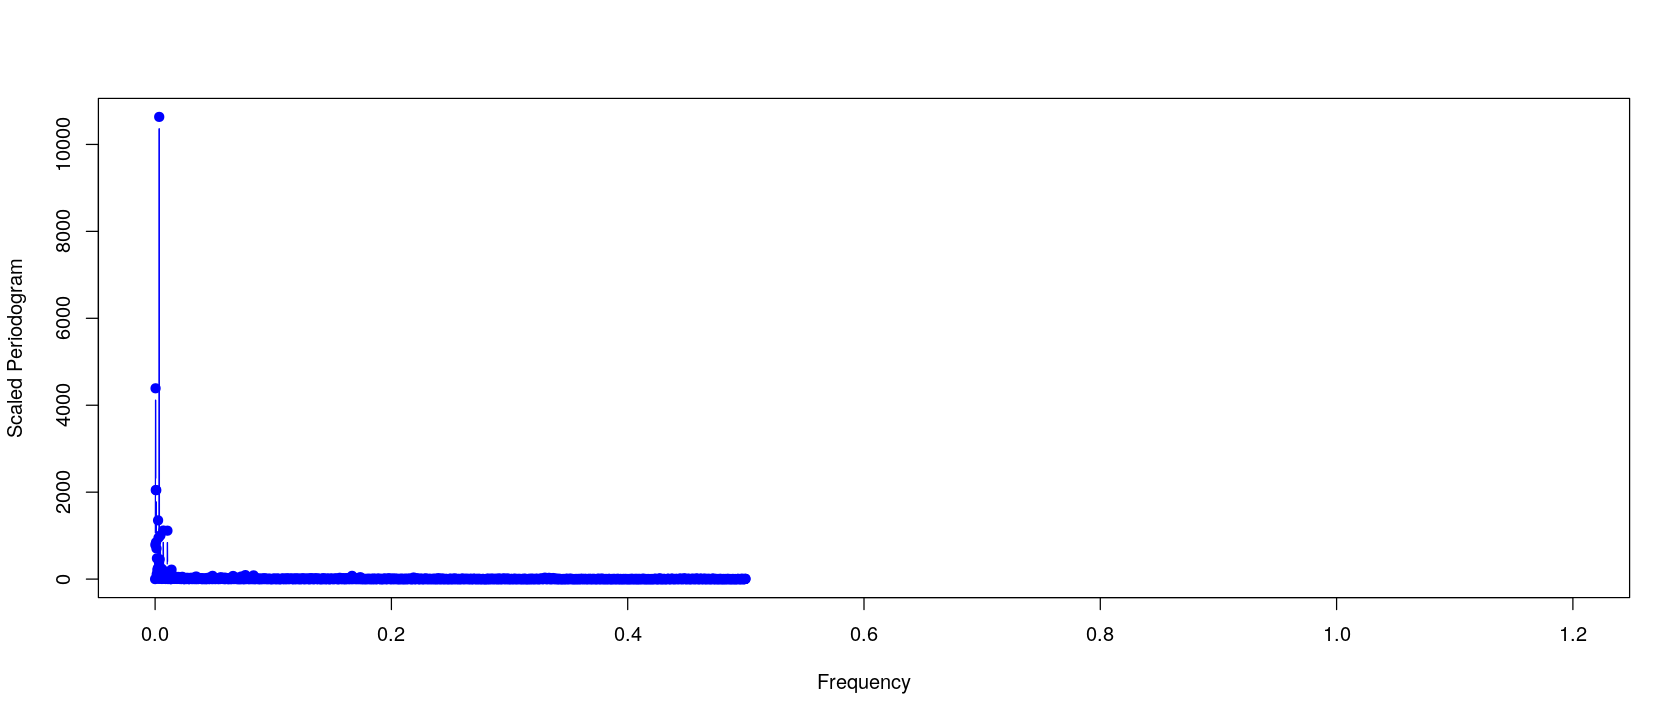

In [21]:
# Periodograma
n=length(ldnc)

P = 4/n*abs(fft(ldnc))^2 
P=P[1:floor(n/2)]#me quedo con las frecuencias posibles
f = (0:(n/2-1))/n #*12 ##El *12 es para llevarlo a la frecuencia original de la serie.
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", xlim=c(0, 1.2), col=4, lwd=1, pch=19)

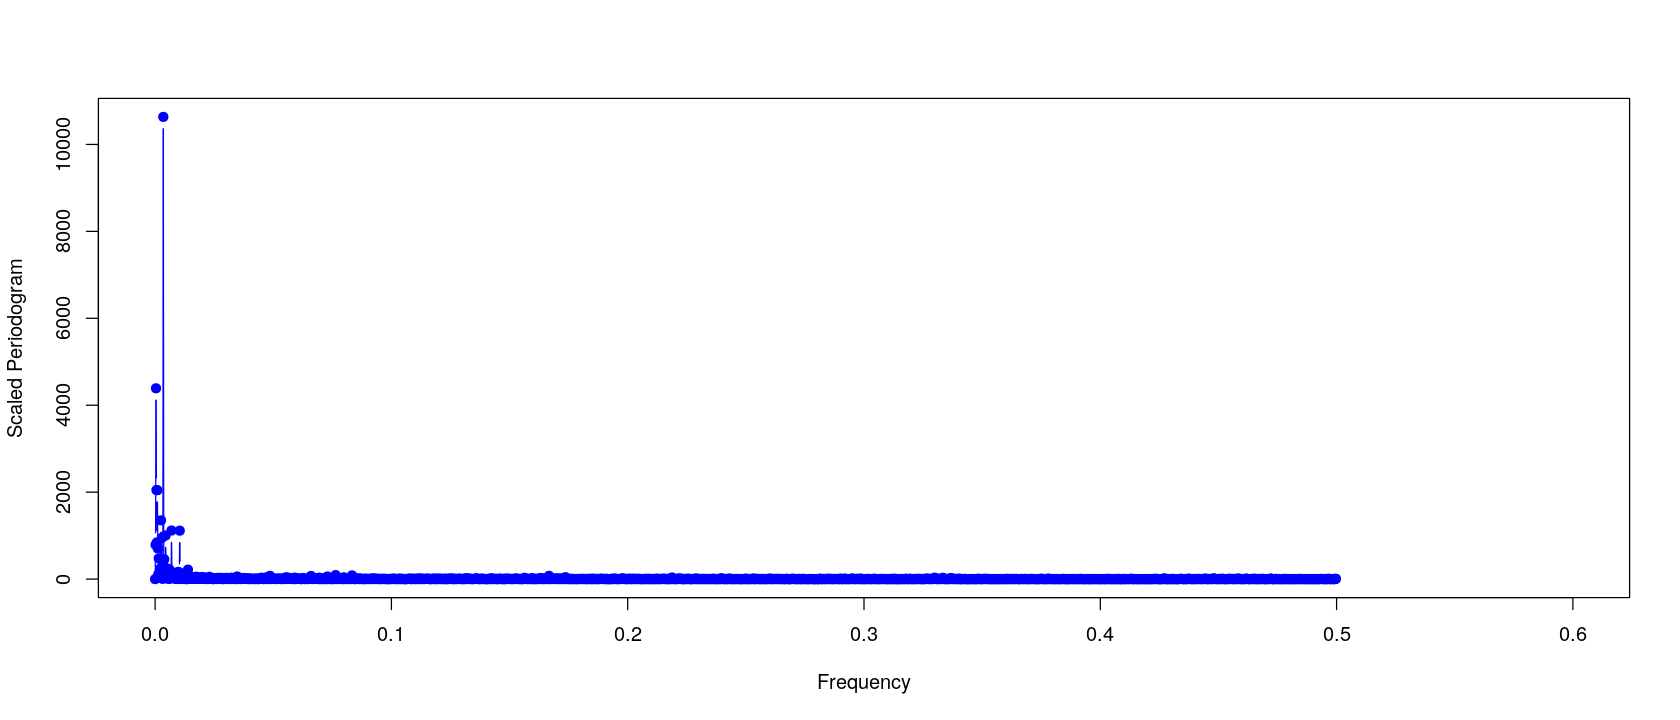

In [22]:
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", xlim=c(0, 0.6), col=4, lwd=1, pch=19)

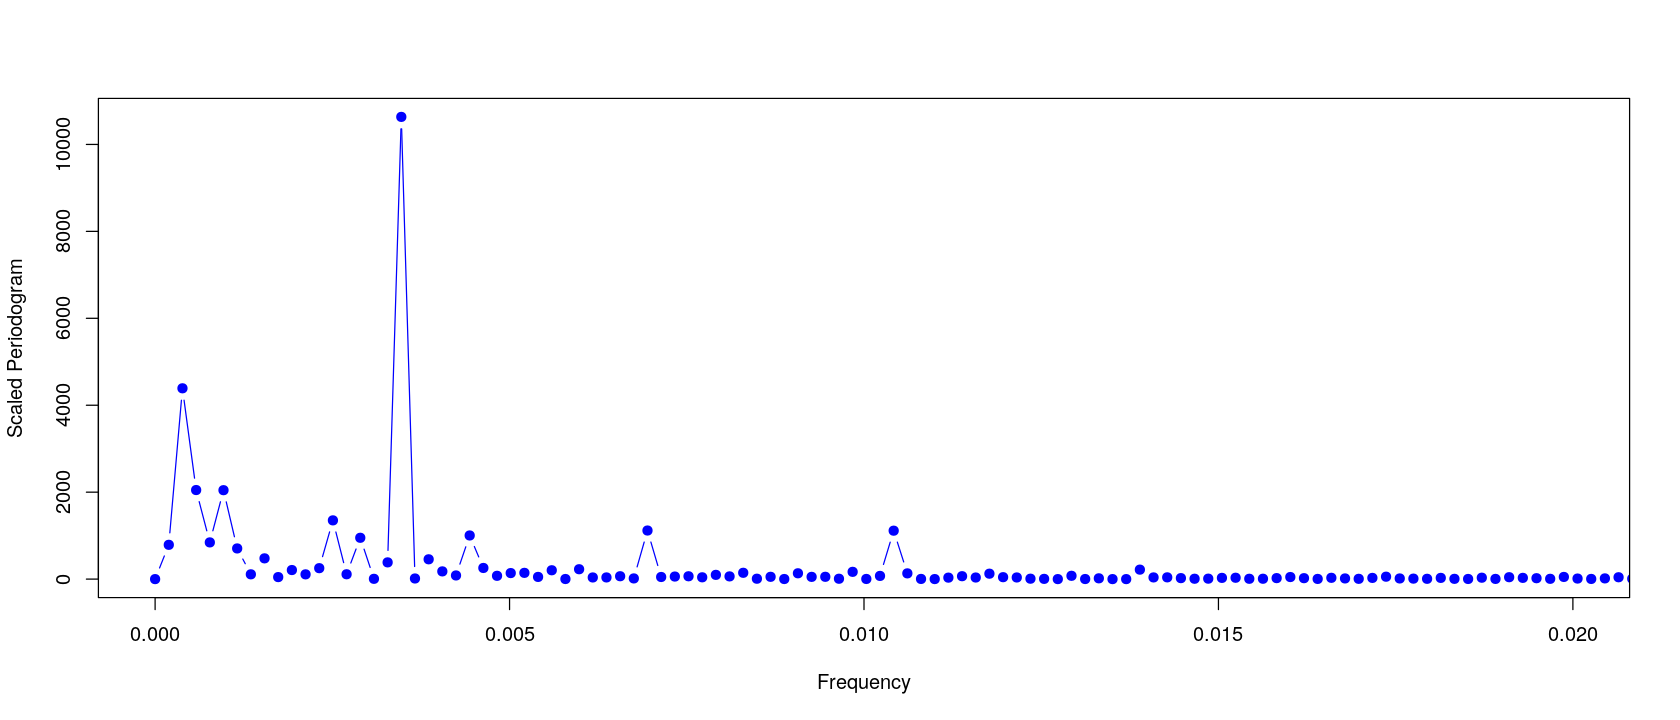

In [23]:
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", xlim=c(0, 0.02), col=4, lwd=1, pch=19)

[1] "0.00019293845263361   789.022669114949"
[1] "0.00038587690526722   4389.85732444942"
[1] "0.00057881535790083   2049.31059946429"
[1] "0.00077175381053444   844.604868127343"
[1] "0.000964692263168049   2046.00110874728"
[1] "0.00115763071580166   705.634171774043"
[1] "0.00154350762106888   477.595715458738"
[1] "0.00250819988423693   1351.61449272937"
[1] "0.00289407678950415   950.730437106649"
[1] "0.00327995369477137   385.0151364472"
[1] "0.00347289214740498   10633.8739105239"
[1] "0.0038587690526722   455.712904523395"
[1] "0.00443758441057303   1004.02799052613"
[1] "0.00694578429480996   1117.97122746504"
[1] "0.0104186764422149   1114.17846792385"


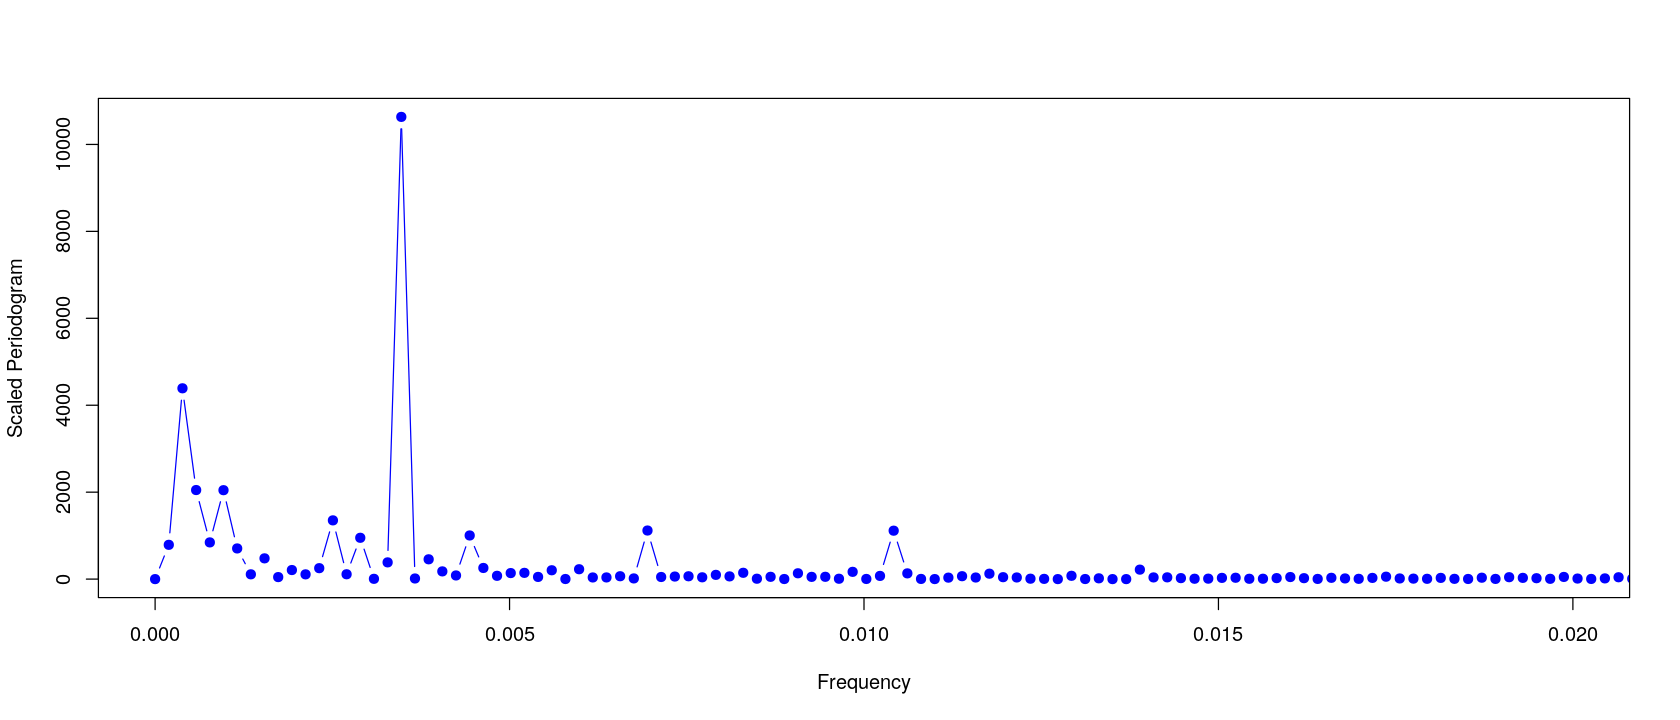

In [24]:
# imprimo de nuevo el periodograma de la serie original transformada
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", xlim=c(0, 0.02), col=4, lwd=1, pch=19)

# me quedo con los valores de un umbral que defino a partir de las primeras observaciones del periodograma
# para elegir las frecuencias
# ajusto el limite de frecuencias a 0.4
P_thresh = 350 # umbral del eje y 
max_freq_idx = length(f)

for (i in (1:max_freq_idx)){
    if (P[i] > P_thresh & f[i] < .02) {
        print(paste(f[i], " " ,P[i]))
        }
}


Call:
lm(formula = ldnc ~ 0 + cos(2 * pi * f1 * t) + sin(2 * pi * f1 * 
    t) + cos(2 * pi * f2 * t) + sin(2 * pi * f2 * t) + cos(2 * 
    pi * f3 * t) + sin(2 * pi * f3 * t) + cos(2 * pi * f4 * t) + 
    sin(2 * pi * f4 * t) + cos(2 * pi * f5 * t) + sin(2 * pi * 
    f5 * t) + cos(2 * pi * f6 * t) + sin(2 * pi * f6 * t) + cos(2 * 
    pi * f7 * t) + sin(2 * pi * f7 * t) + cos(2 * pi * f8 * t) + 
    sin(2 * pi * f8 * t) + cos(2 * pi * f9 * t) + sin(2 * pi * 
    f9 * t) + cos(2 * pi * f10 * t) + sin(2 * pi * f10 * t) + 
    cos(2 * pi * f11 * t) + sin(2 * pi * f11 * t) + cos(2 * pi * 
    f12 * t) + sin(2 * pi * f12 * t) + cos(2 * pi * f13 * t) + 
    sin(2 * pi * f13 * t) + cos(2 * pi * f14 * t) + sin(2 * pi * 
    f14 * t) + cos(2 * pi * f15 * t) + sin(2 * pi * f15 * t), 
    na.action = NULL)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8626 -0.7469 -0.0693  0.6665  4.1268 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
cos(2 * pi * f1 * 

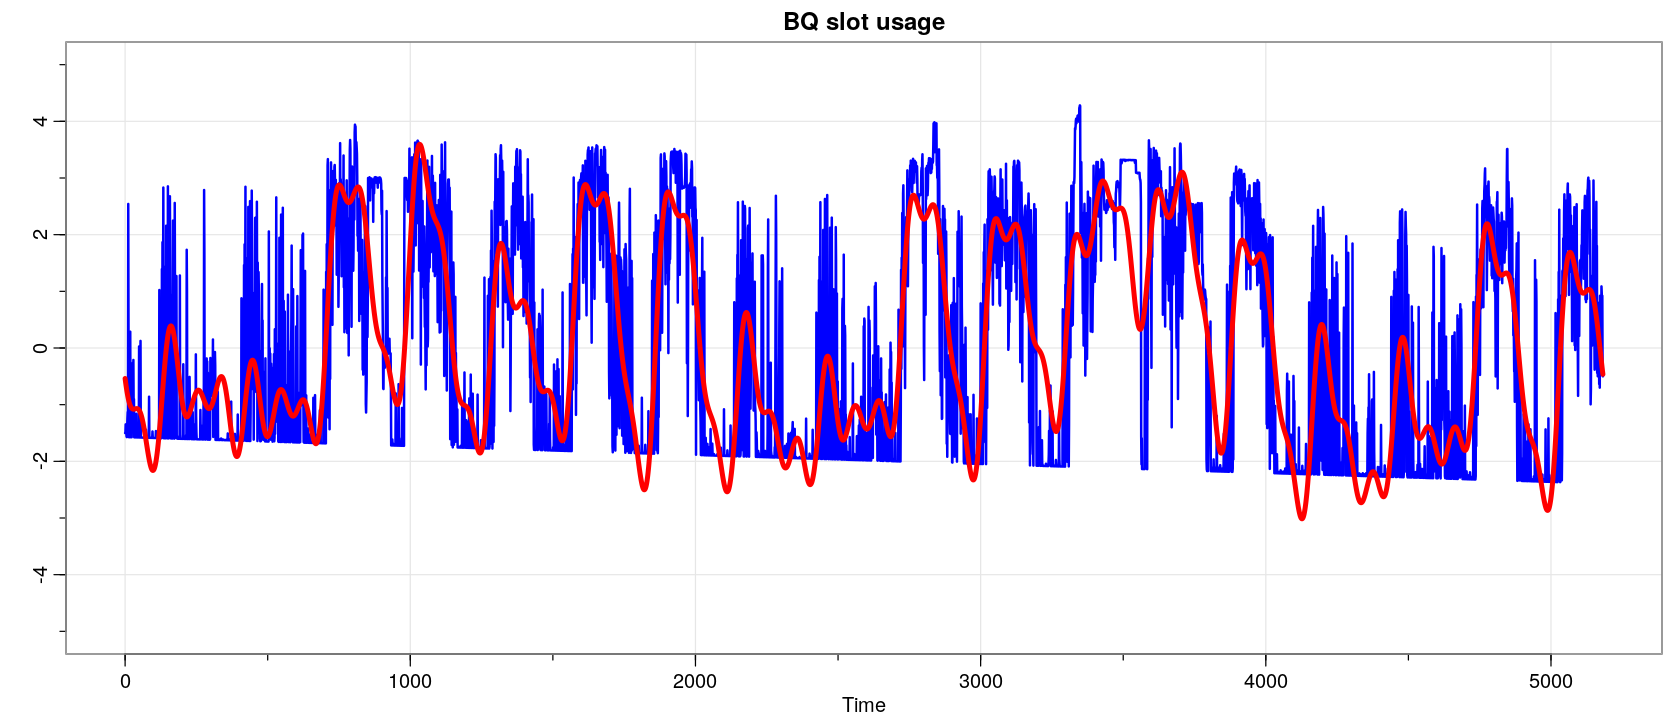

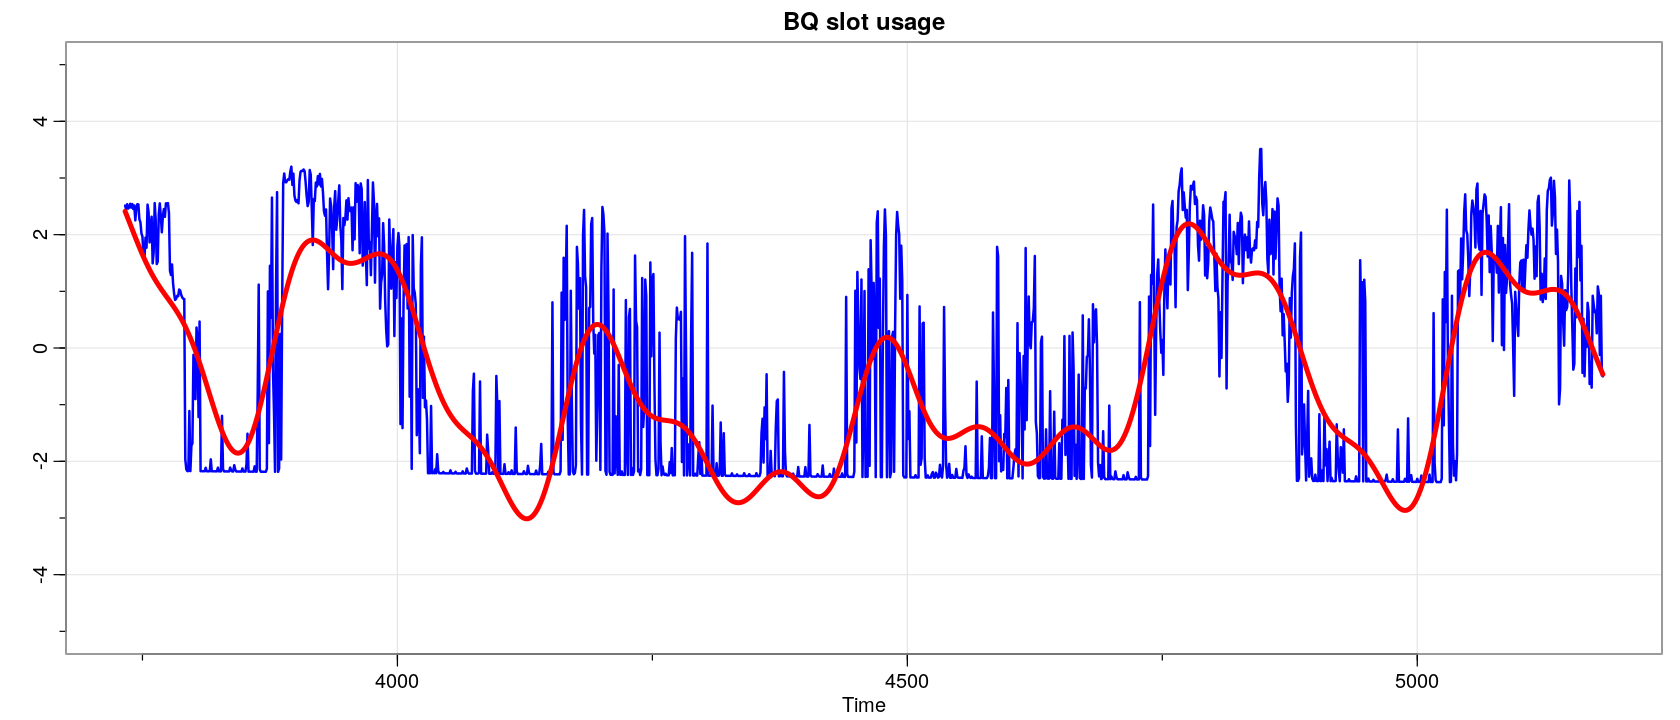

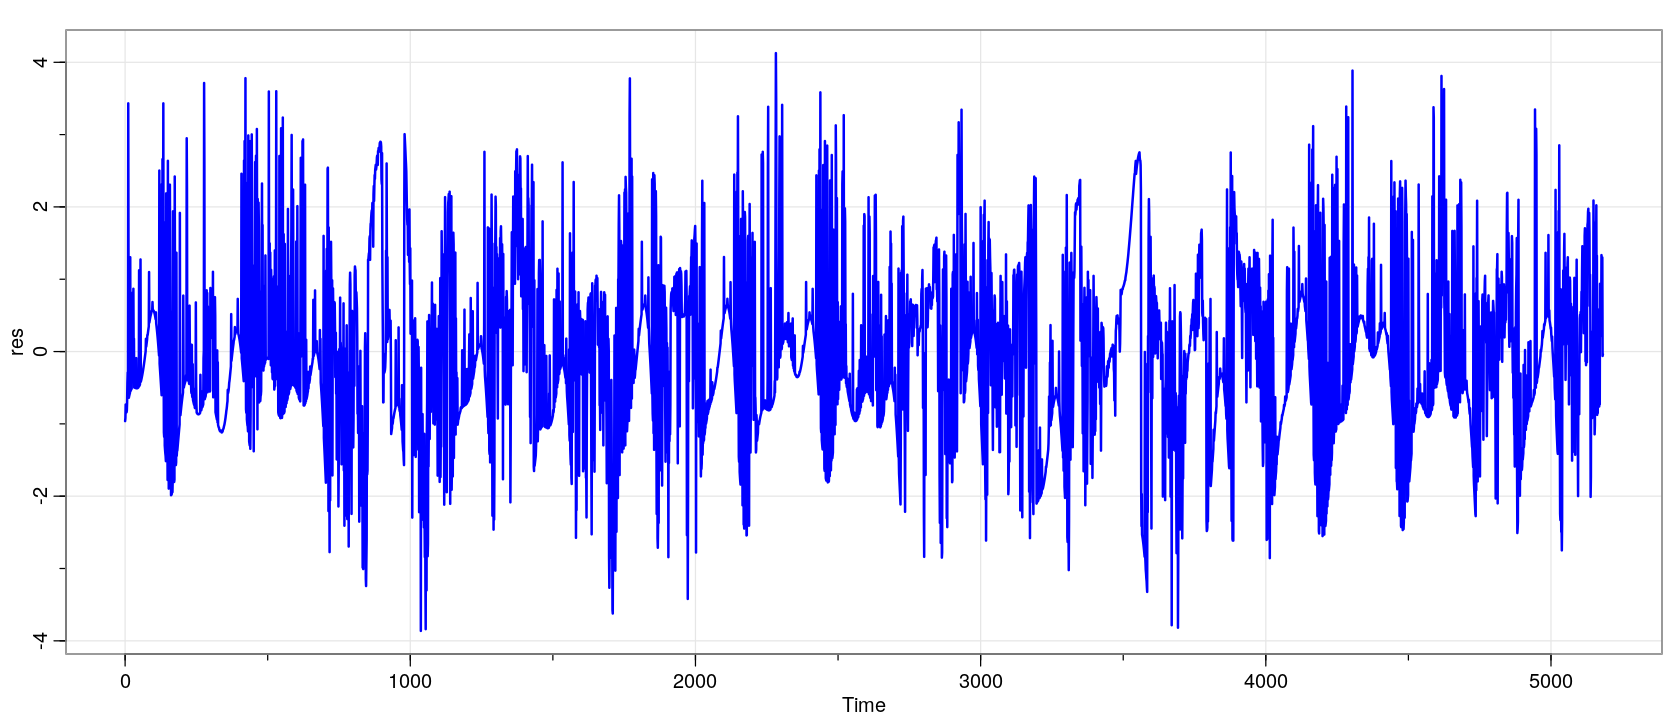

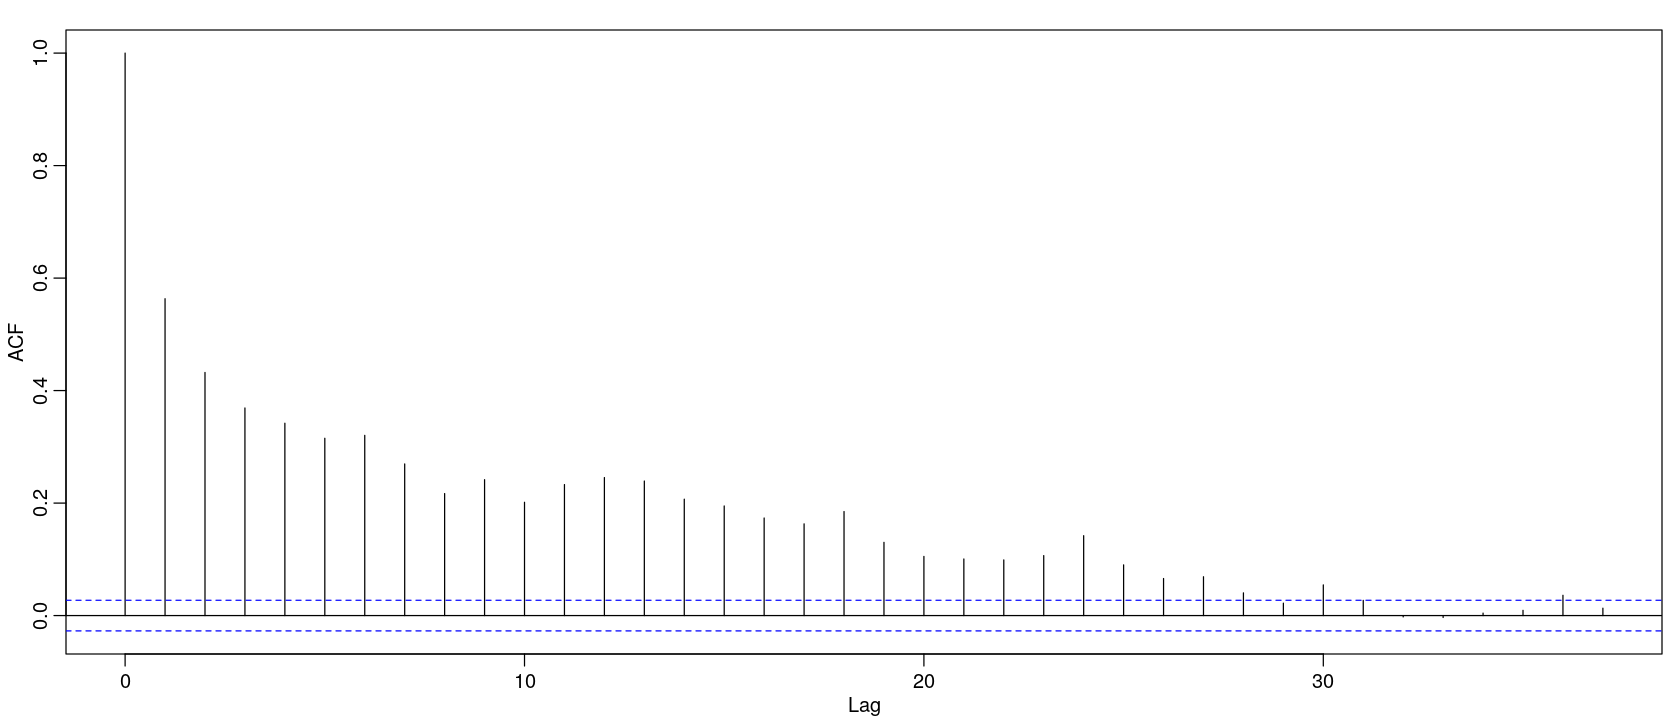

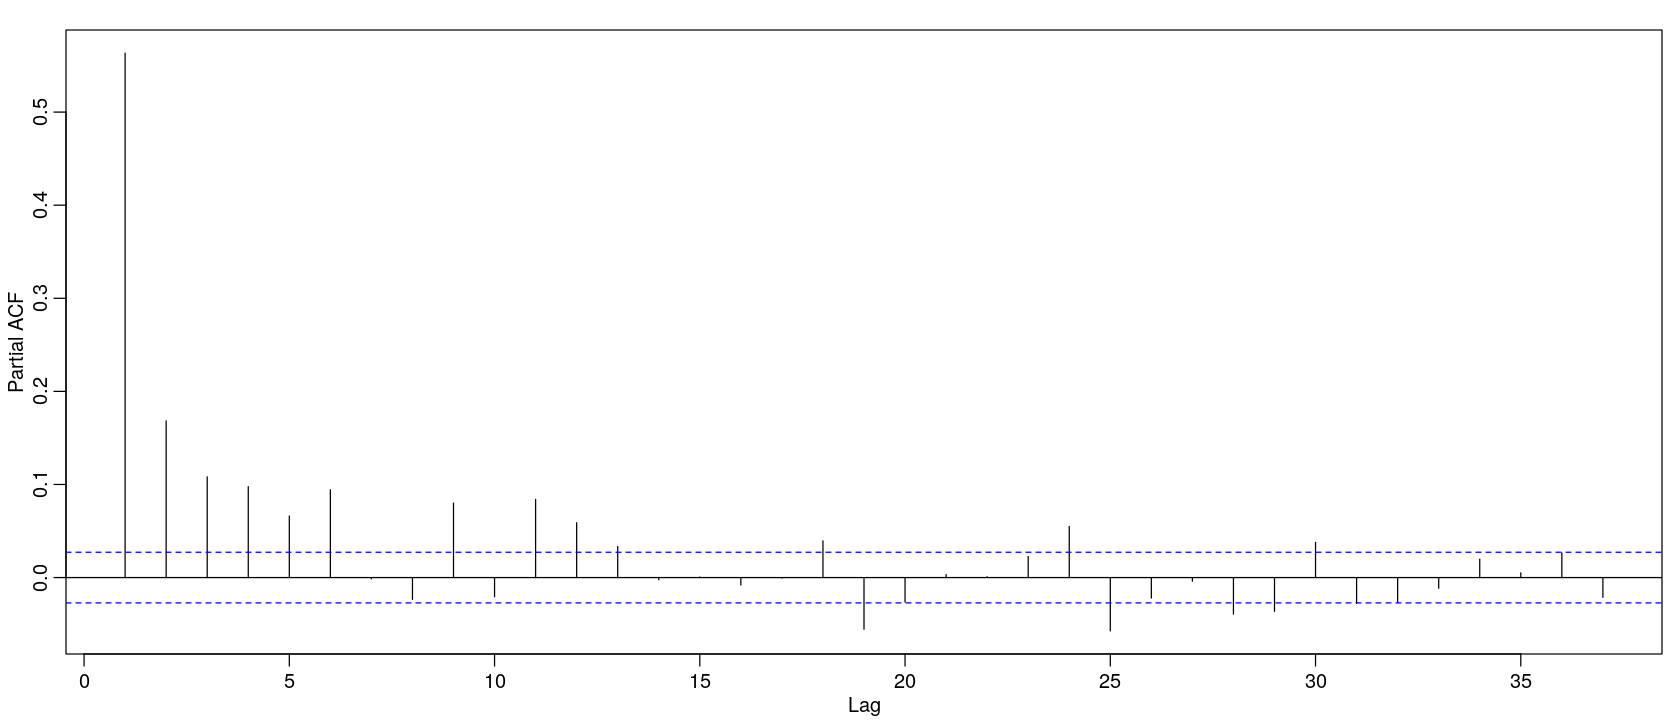

In [25]:
# intento con mas frecuencias, para probar si el acf queda con menos autocorrelacion
t = time(ldnc)

#f1 =  0.000192
#f2 =  0.000385
#f3 =  0.000578
#f4 =  0.000771
#f5 =  0.000964
#f6 =  0.001157
#f7 =  0.002507
#f8 =  0.002893
#f9 =  0.003472
#f10 = 0.004436
#f11 = 0.006944
#f12 = 0.010416
#
#
#fit = lm(ldnc ~ 0 + cos(2*pi*f1*t) + sin(2*pi*f1*t) +
#                  cos(2*pi*f2*t) + sin(2*pi*f2*t) +
#                 cos(2*pi*f3*t) + sin(2*pi*f3*t) +
#                cos(2*pi*f4*t) + sin(2*pi*f4*t) +
#                 cos(2*pi*f5*t) + sin(2*pi*f5*t) +
#                 cos(2*pi*f6*t) + sin(2*pi*f6*t) +
#                 cos(2*pi*f7*t) + sin(2*pi*f7*t) +
#                 cos(2*pi*f8*t) + sin(2*pi*f8*t) +
#                 cos(2*pi*f9*t) + sin(2*pi*f9*t) +
#                 cos(2*pi*f10*t) + sin(2*pi*f10*t) +
#                 cos(2*pi*f11*t) + sin(2*pi*f11*t) +
#                 cos(2*pi*f12*t) + sin(2*pi*f12*t),
#         na.action=NULL)


f1 =  0.000192
f2 =  0.000385
f3 =  0.000578
f4 =  0.000771
f5 =  0.000964
f6 =  0.001157
f7 =  0.001543
f8 =  0.002508
f9 =  0.002894
f10 = 0.003279
f11 = 0.003472
f12 = 0.003858
f13 = 0.004437
f14 = 0.006945
f15 = 0.010418


fit = lm(ldnc ~ 0 + cos(2*pi*f1*t) + sin(2*pi*f1*t) +
                  cos(2*pi*f2*t) + sin(2*pi*f2*t) +
                 cos(2*pi*f3*t) + sin(2*pi*f3*t) +
                cos(2*pi*f4*t) + sin(2*pi*f4*t) +
                 cos(2*pi*f5*t) + sin(2*pi*f5*t) +
                 cos(2*pi*f6*t) + sin(2*pi*f6*t) +
                 cos(2*pi*f7*t) + sin(2*pi*f7*t) +
                 cos(2*pi*f8*t) + sin(2*pi*f8*t) +
                 cos(2*pi*f9*t) + sin(2*pi*f9*t) +
                 cos(2*pi*f10*t) + sin(2*pi*f10*t) +
                 cos(2*pi*f11*t) + sin(2*pi*f11*t) +
                 cos(2*pi*f12*t) + sin(2*pi*f12*t) +
                 cos(2*pi*f13*t) + sin(2*pi*f13*t) +
                 cos(2*pi*f14*t) + sin(2*pi*f14*t) +
                 cos(2*pi*f15*t) + sin(2*pi*f15*t),
         na.action=NULL)




summary(fit)       # regression results


prediction = ts(fitted(fit), start=0, freq=1)


# hago la prediccion para el primer valor de la serie de test
tn = start_test - 1 
v = 0 + cos(2*pi*f1*tn) + sin(2*pi*f1*tn) +
              cos(2*pi*f2*tn) + sin(2*pi*f2*tn) +
             cos(2*pi*f3*tn) + sin(2*pi*f3*tn) +
            cos(2*pi*f4*tn) + sin(2*pi*f4*tn) +
             cos(2*pi*f5*tn) + sin(2*pi*f5*tn) +
             cos(2*pi*f6*tn) + sin(2*pi*f6*tn) +
             cos(2*pi*f7*tn) + sin(2*pi*f7*tn) +
             cos(2*pi*f8*tn) + sin(2*pi*f8*tn) +
             cos(2*pi*f9*tn) + sin(2*pi*f9*tn) +
             cos(2*pi*f10*tn) + sin(2*pi*f10*tn) +
             cos(2*pi*f11*tn)+ sin(2*pi*f11*tn) +
             cos(2*pi*f12*tn)+ sin(2*pi*f12*tn) +
             cos(2*pi*f13*tn)+ sin(2*pi*f13*tn) +
             cos(2*pi*f14*tn)+ sin(2*pi*f14*tn) +
             cos(2*pi*f15*tn) + sin(2*pi*f15*tn)
vdf <- data.frame(t = v)
# la prediccion de la serie compuesta por series periodicas
fore_f = predict(fit, vdf)    


tsplot(ldnc, ylab="", main="BQ slot usage", col=4, lwd=2, ylim=c(-5,5))
lines(prediction, col=2, lwd=4)


tsplot(tail(ldnc,1450), ylab="", main="BQ slot usage", col=4, lwd=2, ylim=c(-5,5))
lines(tail(prediction,1450), col=2, lwd=4)

res = (ts(residuals(fit), start=0, freq=1))
#res = (ts(ldnc-prediction, start=0, freq=1))
tsplot(res, col=4, lwd=2)
acf(res)
pacf(res)

In [26]:
ldncr1 = res

Series: ldncr1 
ARIMA(6,0,0) with zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ar6
      0.4270  0.0953  0.0519  0.0589  0.0253  0.0944
s.e.  0.0138  0.0150  0.0151  0.0151  0.0150  0.0138

sigma^2 estimated as 0.8552:  log likelihood=-6946.25
AIC=13906.51   AICc=13906.53   BIC=13952.38

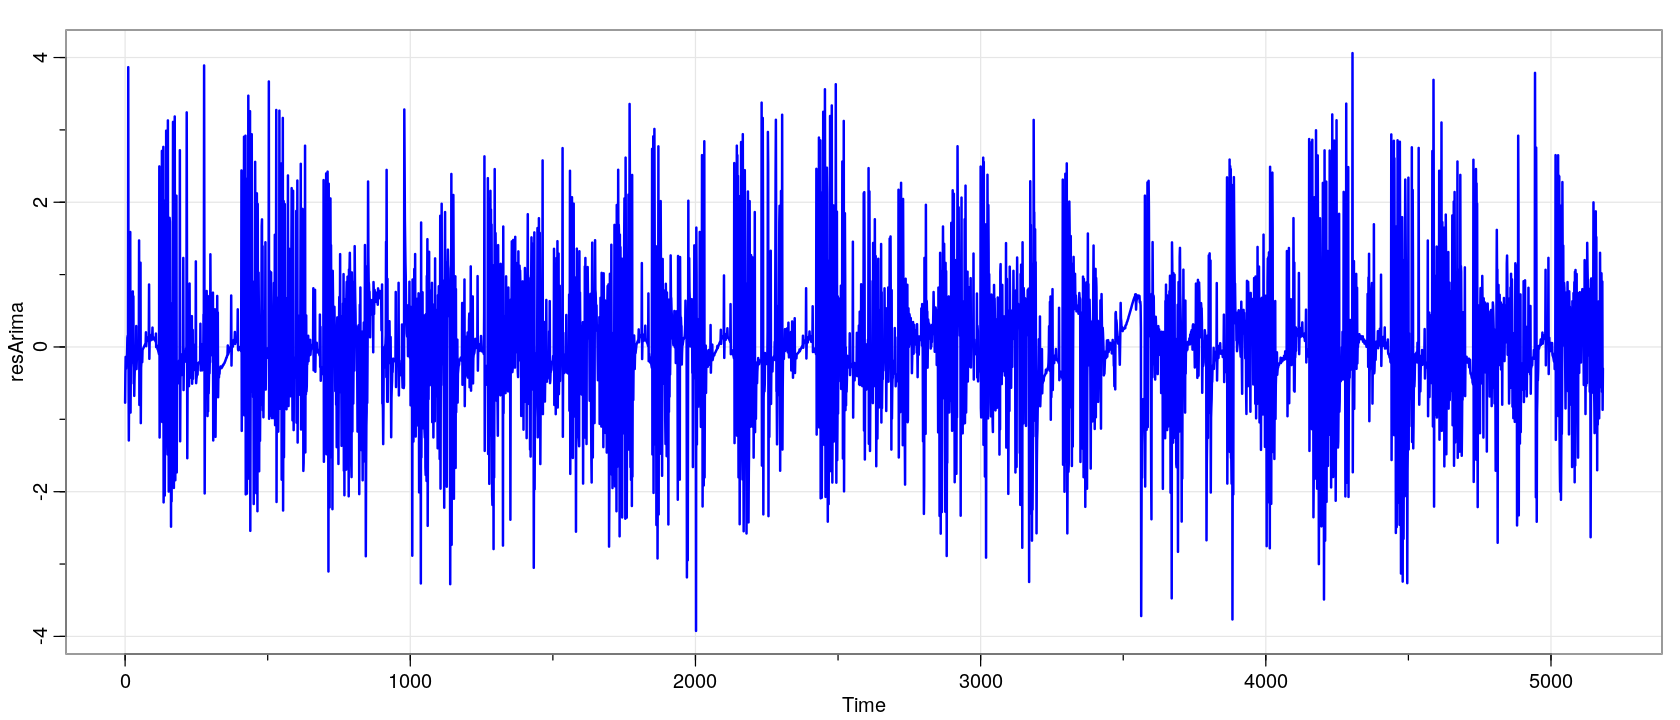

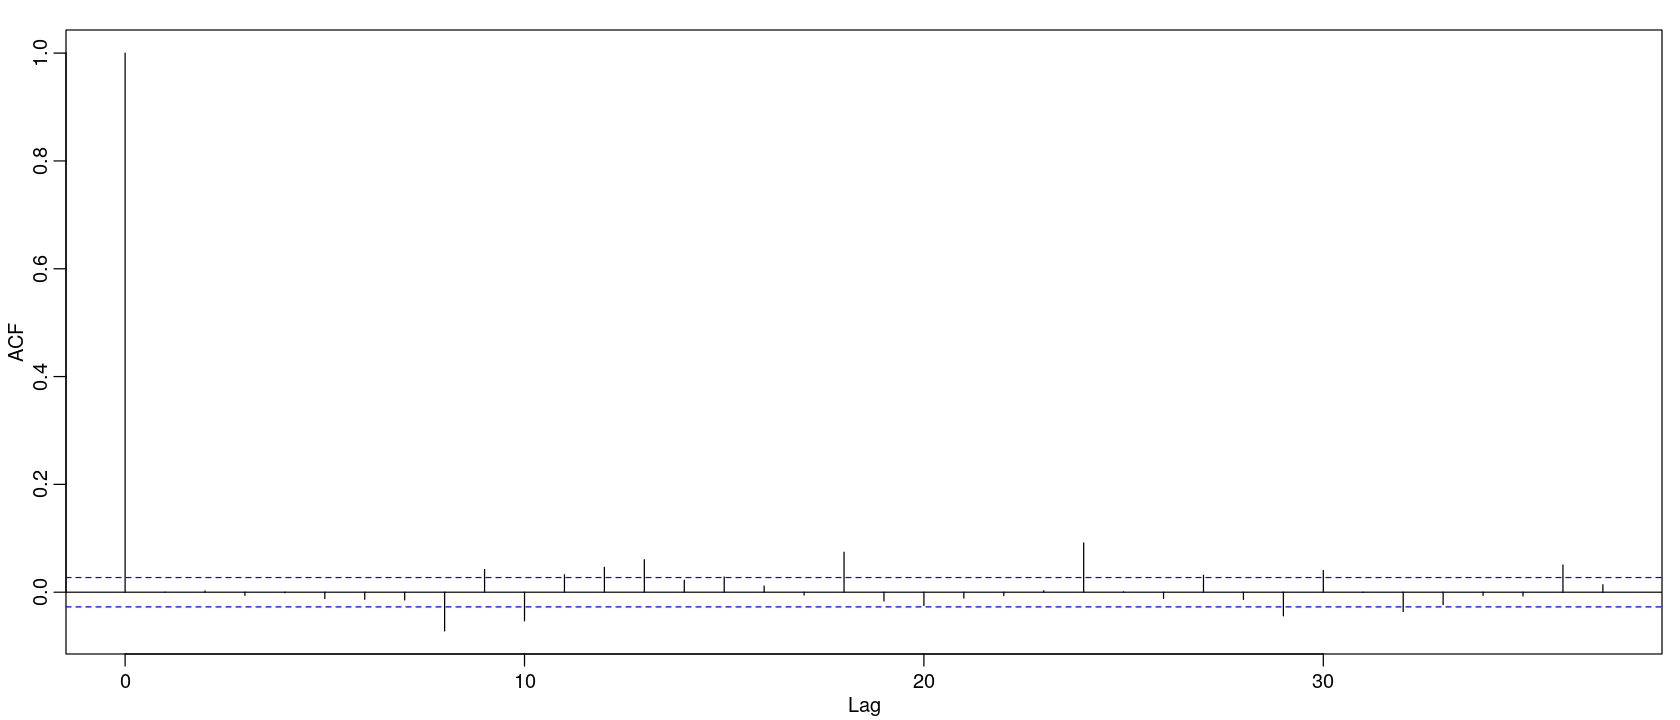

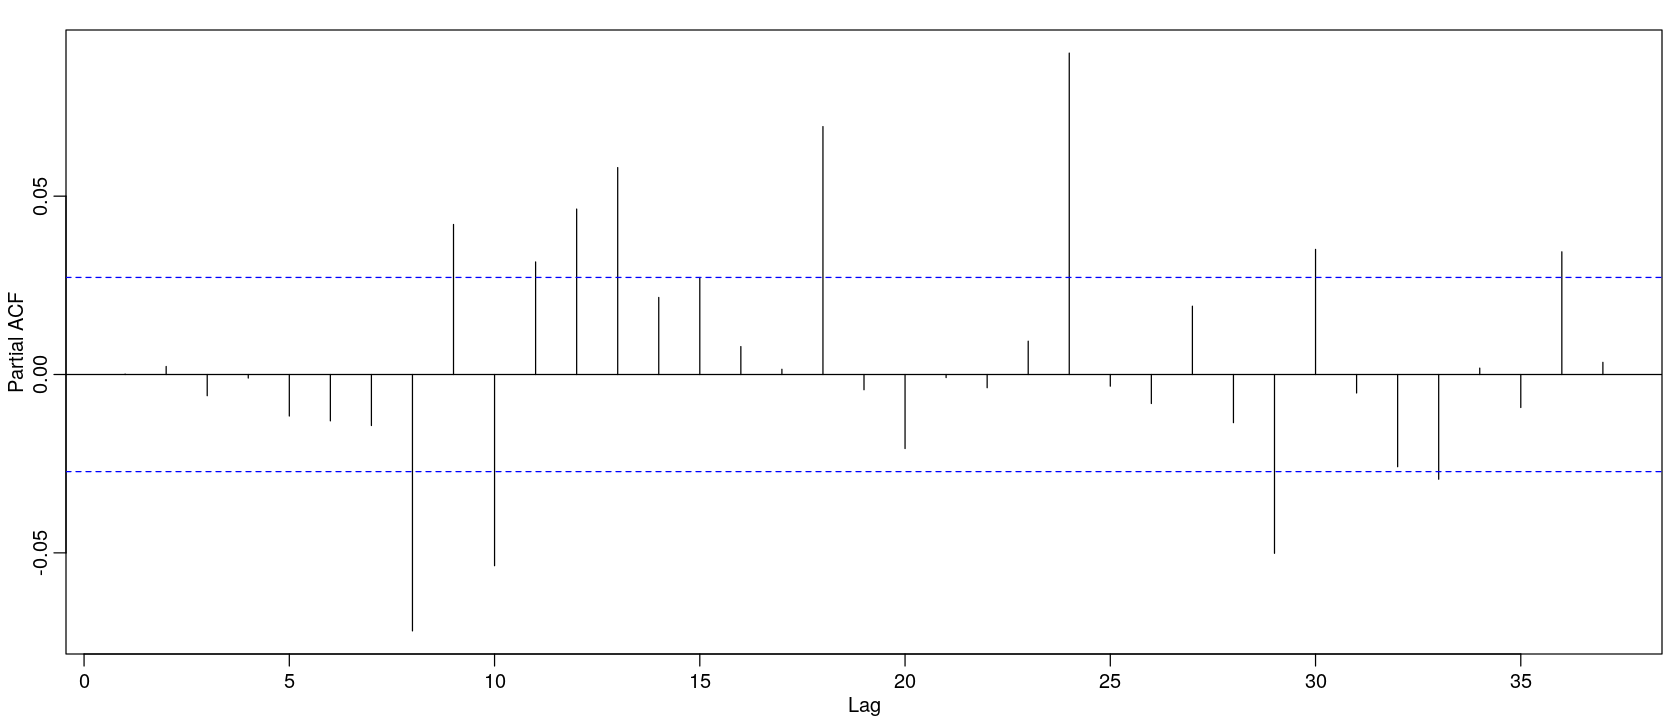

In [27]:

# no me quedo claro de acuerdo a acf y pacf que parametros elegir, pero parece que en lag 4 pasa algo...
# probe con 4 coeficientes para ar y para ma , lo que parece mejor es arma(1,4)

# ARMA
fit = Arima(ldncr1, order = c(6,0,0), include.mean=FALSE)
fit

resArima = (ts(residuals(fit), start=0, freq=1))
tsplot(resArima, col=4, lwd=2)

acf(resArima)
pacf(resArima)


Series: ldncr1 
ARIMA(6,0,0)(6,0,0)[6] with zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ar6     sar1    sar2    sar3
      0.4255  0.0989  0.0453  0.0626  0.0224  0.0894  -0.0210  0.0380  0.0731
s.e.  0.0140  0.0152  0.0152  0.0154  0.0151  0.0253   0.0276  0.0147  0.0139
        sar4    sar5    sar6
      0.0913  0.0375  0.0385
s.e.  0.0139  0.0141  0.0141

sigma^2 estimated as 0.8395:  log likelihood=-6895.55
AIC=13817.09   AICc=13817.16   BIC=13902.28

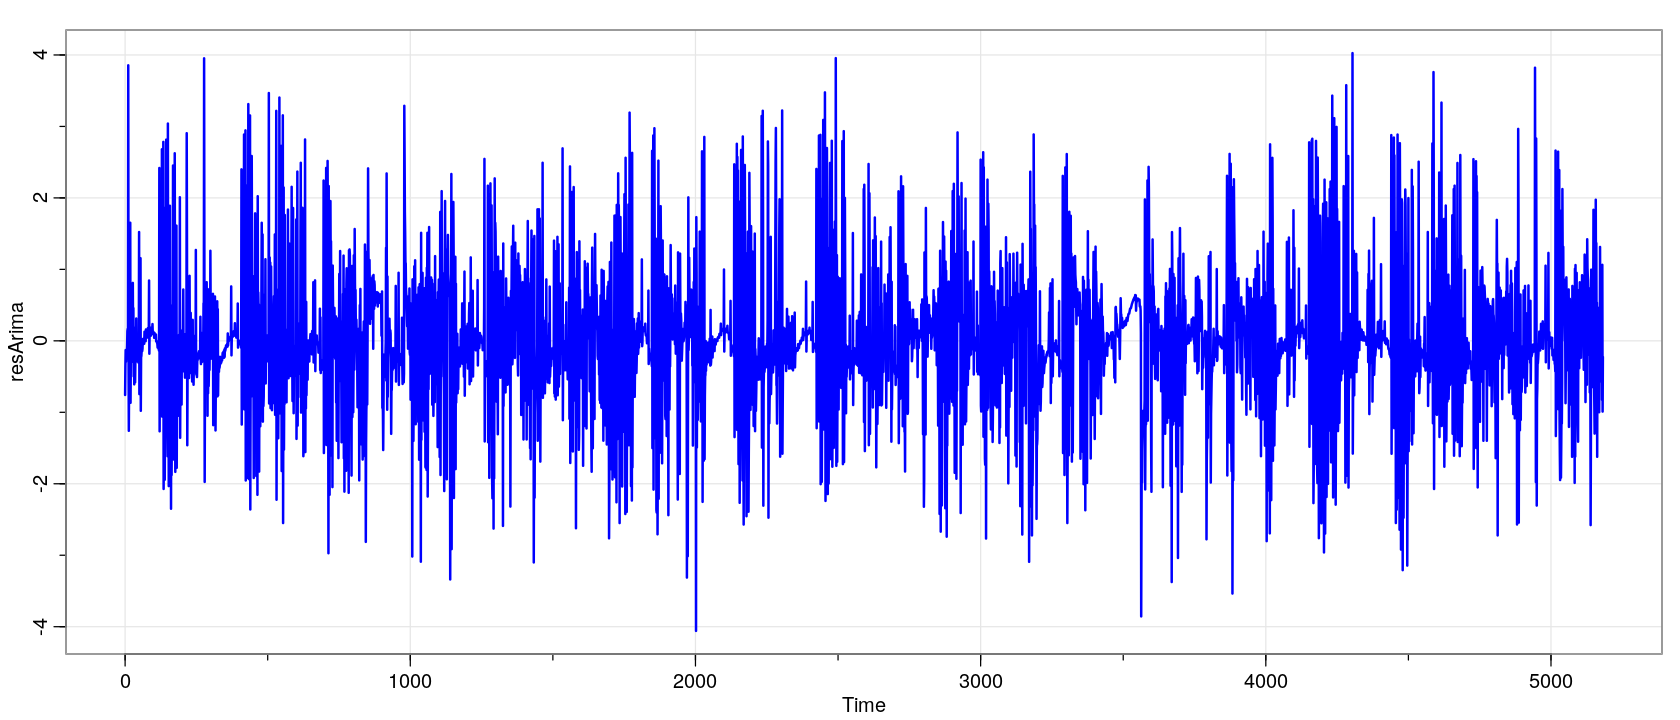

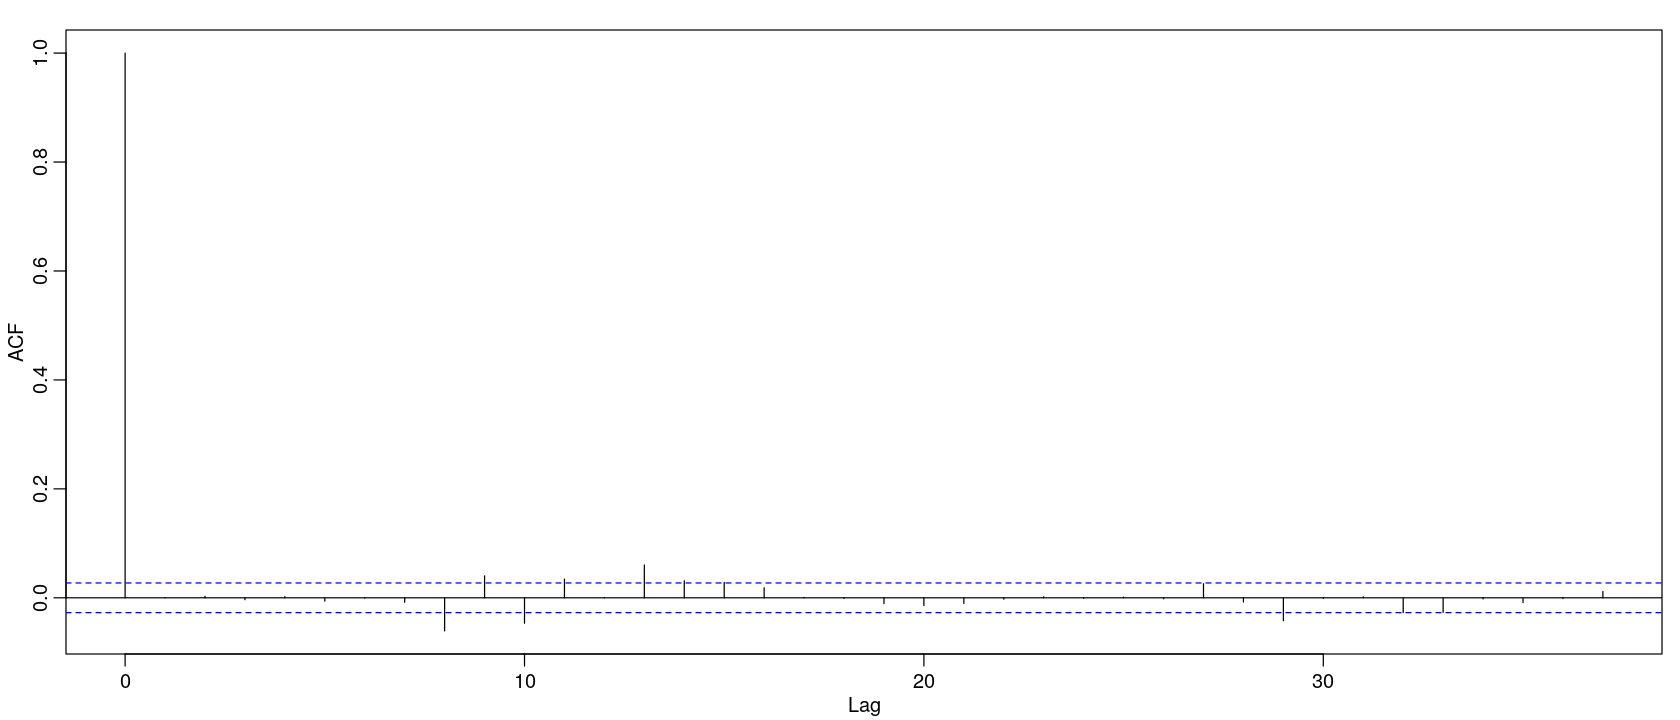

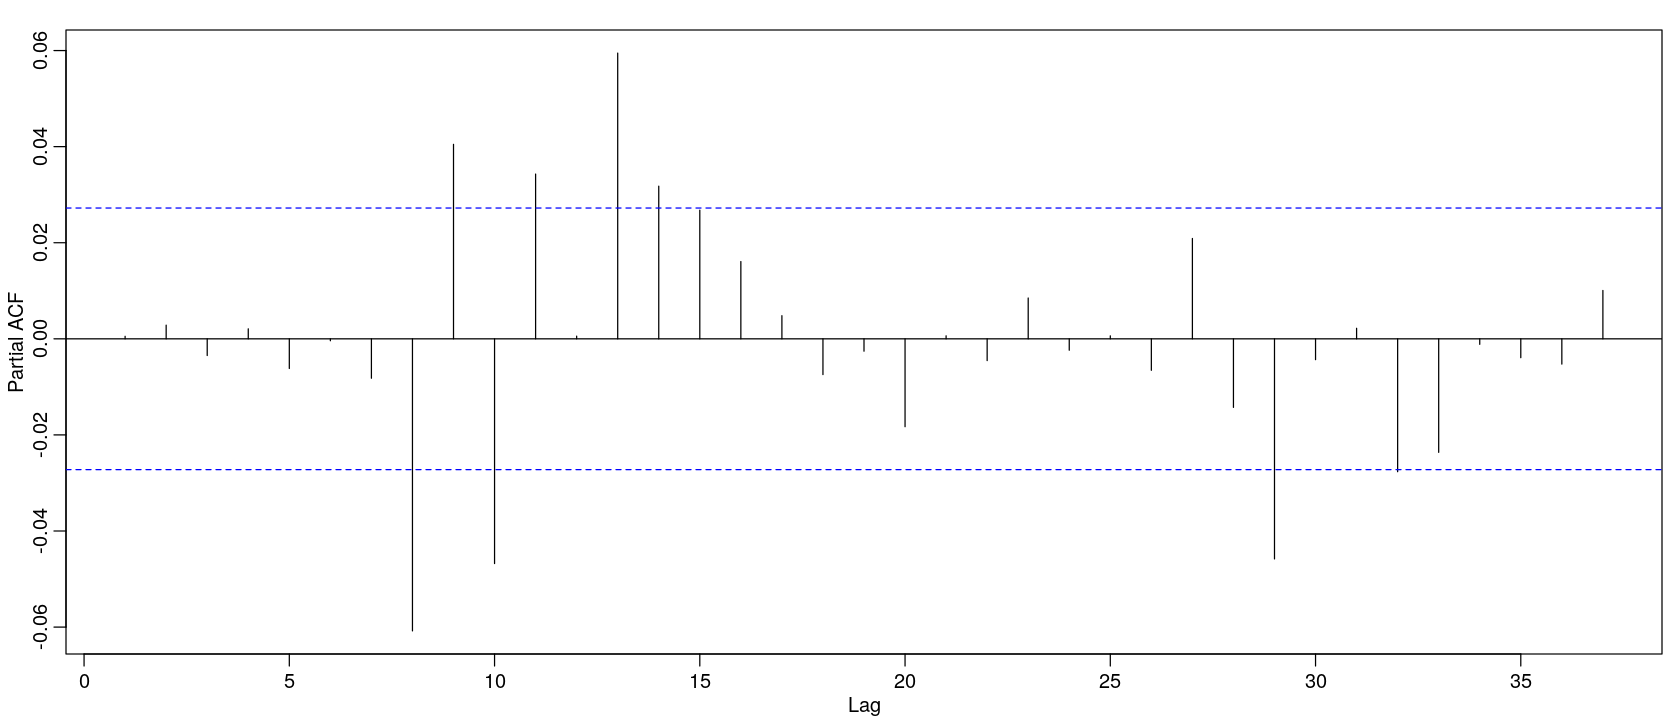

In [28]:
# ARMA SEASONAL (ARIMA(0,0,0)(1,0,0) 6 )
#fit = Arima(ldncr1, order = c(6,0,0), seasonal = list(order = c(1,0,0), period = 24), include.mean=FALSE)
fit = Arima(ldncr1, order = c(6,0,0), seasonal = list(order = c(6,0,0), period = 6), include.mean=FALSE)


fit

resArima = (ts(residuals(fit), start=0, freq=1))
tsplot(resArima, col=4, lwd=2)

acf(resArima)
pacf(resArima)


Series: ldncr1 
ARIMA(6,0,0)(6,0,0)[6] with zero mean 

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ar6     sar1    sar2    sar3
      0.4255  0.0989  0.0453  0.0626  0.0224  0.0894  -0.0210  0.0380  0.0731
s.e.  0.0140  0.0152  0.0152  0.0154  0.0151  0.0253   0.0276  0.0147  0.0139
        sar4    sar5    sar6
      0.0913  0.0375  0.0385
s.e.  0.0139  0.0141  0.0141

sigma^2 estimated as 0.8395:  log likelihood=-6895.55
AIC=13817.09   AICc=13817.16   BIC=13902.28

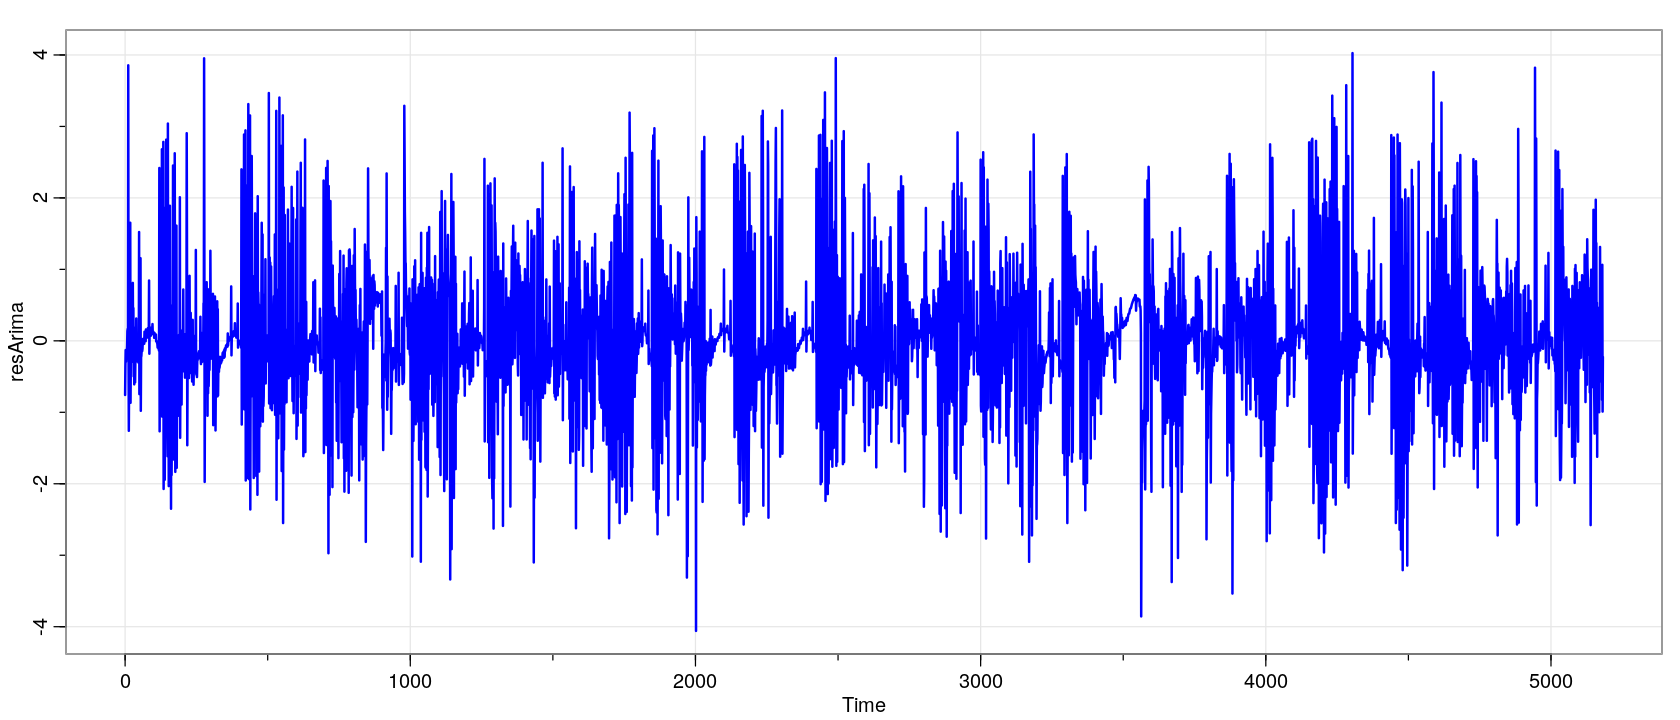

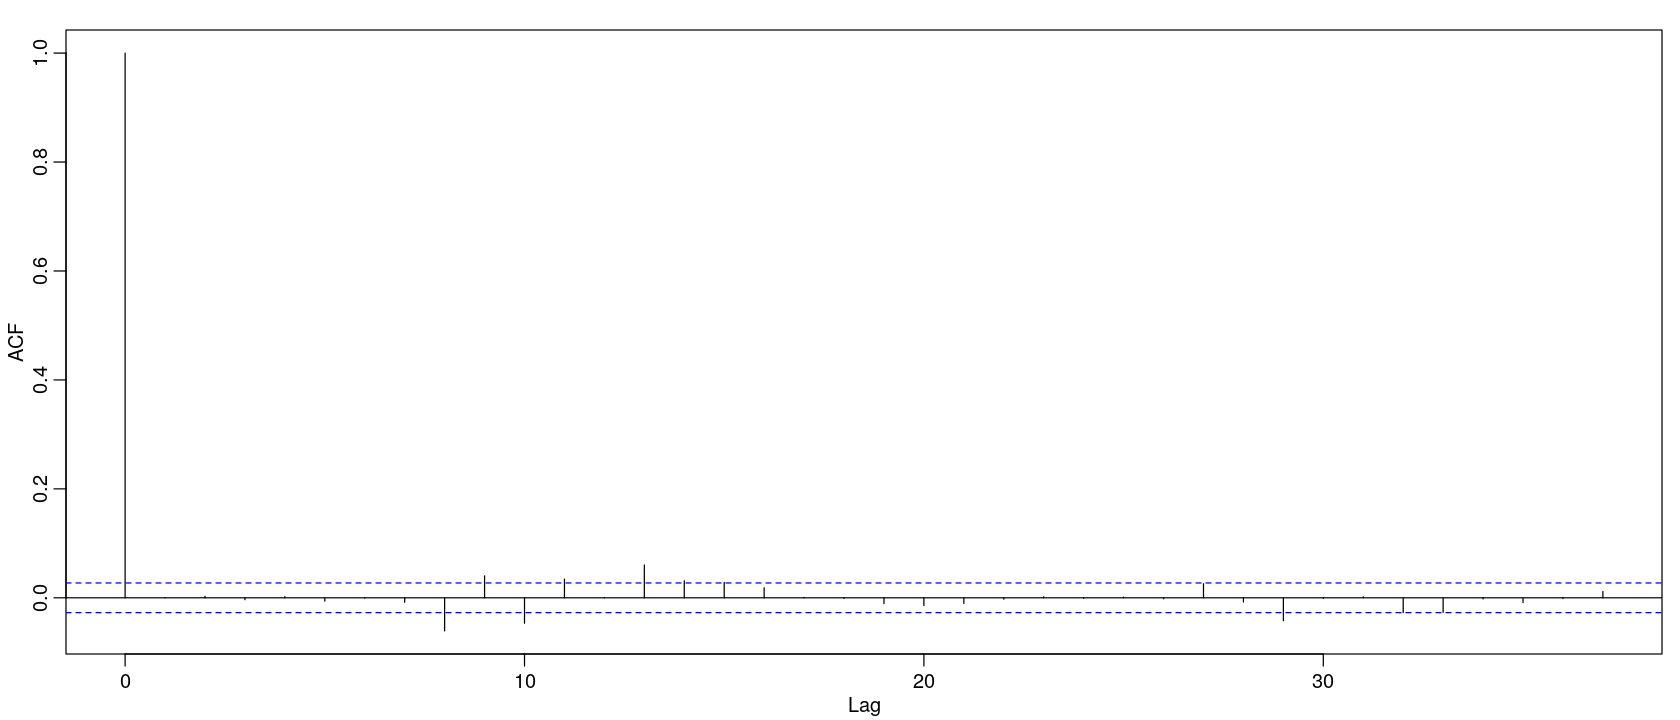

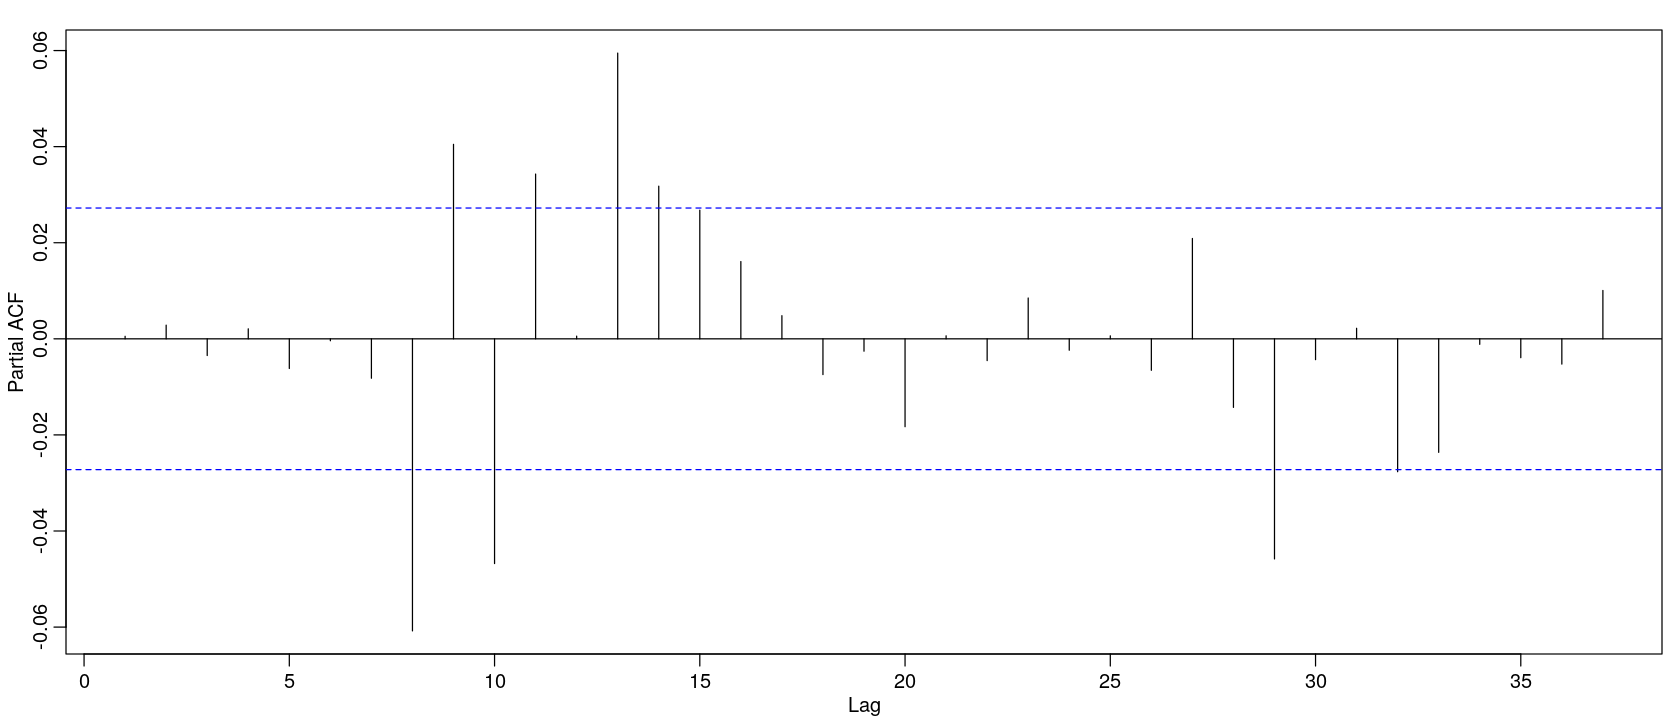

In [32]:
# ARMA SEASONAL (ARIMA(6,0,0)(6,0,0) 6 )

# ajustamos parametros de arma seasonal de acuerdo a 
# https://online.stat.psu.edu/stat510/lesson/4/4.2    y    https://otexts.com/fpp3/seasonal-arima.html

# vemos que después aplicar el periodograma y quitarle las frecuencias periódicas, en el residuo que se obtiene:
# 1- el acf decae similar a una exponencial
# 2- en el pacf vemos 6 picos significativos cada 6 lags

# por esto probamos entre otros un modelo ARIMA(6,0,0)(6,0,0) 6, hasta ahora es el que nos devolvió el AIC mas bajo


fit = Arima(ldncr1, order = c(6,0,0), seasonal = list(order = c(6,0,0), period = 6), include.mean=FALSE)

fit

resArima = (ts(residuals(fit), start=0, freq=1))
tsplot(resArima, col=4, lwd=2)

acf(resArima)
pacf(resArima)


In [ ]:
# otras pruebas

In [ ]:
fore = predict(fit, n.ahead=1)

fore

In [ ]:
predict_trend

In [ ]:
e = exp(1)

In [ ]:
f_fore = e^(fore$pred + fore_f + predict_trend)

In [ ]:
f_fore

In [ ]:
exp(ldnt[1])
time(ldnt[1])

In [ ]:
ts.plot(exp(ldnt), f_fore, col=c(4,2), lwd=2, xlim=c(5184,5190), ylim=c(0,20), ylab="Slots BQ")

#Construyo un intervalo de confianza
#U = fore$pred+fore$se; L = fore$pred-fore$se
#xx = c(time(U), rev(time(U))); yy = c(L, rev(U))

#polygon(xx, yy, border = 2, col = gray(.6, alpha = .2))
lines(f_fore, type="p", col=2, lwd=2)

In [ ]:
tt = time(ldnt)

In [ ]:
fitt = lm(ldnt ~ tt, na.action=NULL)
summary(fitt)

num = length(ldnt)

tsplot(ldnt, ylab="", main="Slots BQ", col=4, lwd=2)
predictiont = ts(fitted(fitt), start=start_test, freq=1)
lines(predictiont, col=2, lwd=4)

ldnt = as.numeric(ldnt)
ldntc = ldnt-predictiont

tsplot(ldntc, ylab="", main="Slots BQ", col=4, lwd=2)

In [ ]:
e = exp(1)

ldnt = ts(ldnt, start=start_test, frequency=1)

v_ldnt = ldnt #c + predictiont
v_pred = fore$pred + predictiont

v_ldnt = e^v_ldnt
v_pred = e^v_pred


ts.plot(v_ldnt, v_pred, col=c(4,2), lwd=2, xlim=c(5184,5300), ylab="Slots BQ", ylim=c(0,15))

In [ ]:
time(v_pred)

In [ ]:
v_ldnt[0:20]

In [ ]:
v_pred[0:20]

In [ ]:
time(v_ldnt)

In [ ]:
v_pred

In [ ]:
ts.plot(ldnc, col=c(4), lwd=2, xlim=c(5184,5428), ylab="Slots BQ")

In [ ]:
fore$pred

In [ ]:
ldntc[0:10]

In [ ]:
time(fore$pred)

In [ ]:
time(ldntc)[0:10]

In [ ]:
# 1.384 pred
# 

In [ ]:
2.718^1.286

In [ ]:
2.718^3.899